In [1]:
def siglas(nome_time):
    if nome_time == 'Bauru':
        return 'BAU'
    
    elif nome_time == 'MOGI1':
        return 'MOG'
    
    elif nome_time == 'VipTech CMB':
        return 'CMO'
    
    elif nome_time == 'Brasília':
        return 'BSB'
    
    elif nome_time == 'Paulistano':
        return 'CAP'
    
    elif nome_time == 'Flamengo':
        return 'FLA'
    
    elif nome_time == 'Minas':
        return 'MIN'
    
    elif nome_time == 'UNIFACISA':
        return 'UFC'
    
    elif nome_time == 'Cerrado Basquete':
        return 'CER'
    
    elif nome_time == 'Sesi Franca':
        return 'FRA'
    
    elif nome_time == 'Corinthians':
        return 'COR'
    
    elif nome_time == 'Pinheiros':
        return 'PIN'
    
    elif nome_time == 'Fortaleza B. C':
        return 'FOR'
    
    elif nome_time == 'KTO Caxias do Sul':
        return 'CAX'
    
    elif nome_time == 'Pato Basquete':
        return 'PAT'
    
    elif nome_time == 'São Paulo':
        return 'SPF'

# Projeto: Análises Jogada-Jogada NBB 2019

Para esse projeto estaremos analisando jogos do NBB, principal campeonato brasileiro de basquetebol. Os dados contém os seguintes campos:

Colunas:
* Quartos
* Tempo
* placar_casa
* placar_visitante
* Nome
*


Coluna Indicadores técnicos:

* fim_quarto -> Fim de quarto (qualquer quarto)
* inicio_quarto -> Inicio de quarto (qualquer quarto)
* fim_partida  -> Fim da Partida
* incio partida -> Inicio da Partida
* Min        -> Minutos jogados do jogador
* Pts_C      -> Pontos Convertidos 
* Pts_T      -> Pontos Tentados 
* Pts_3_C    -> Três Pontos Convertidos 
* 3_T_Pts    -> Três Pontos Tentados
* 2_C_Pts    -> Dois Pontos Convertidos
* 2_T_Pts    -> Dois Pontos Tentados
* LL_Pts_C   -> Lances Livres Convertidos
* LL_Pts_T   -> Lances Livres Tentados
* RO         -> Rebotes Ofensivos
* RD         -> Rebotes Defensivos
* RT         -> Rebotes Totais
* AS         -> Assistências
* BR         -> Bolas Roubadas 
* TO         -> Tocos
* FC         -> Faltas Cometidas
* FC_T         -> Faltas Técnica
* FC_A         -> Faltas Antidesportiva
* FC_O       -> Faltas Ofensiva
* FC_D        -> Faltas Desqualificante
* Entra       -> Entrada na Substituição 
* Sai           -> Saida na Substituição 
* tempo_tecnico -> Tempo Técnico
* ER         -> Erros
* FR         -> Faltas Recebidas 
* EN         -> Enterradas
* Ar_Pts_C   -> Arremessos dos Pontos Convertidos
* Ar_Pts_C   -> Arremessos dos Pontos Tentados 
* Pos        -> Posse de bola do time 

In [2]:
# !pip install dataframe_image

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
import re
import dataframe_image as dfi

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from matplotlib.collections import LineCollection

In [6]:
from fpdf import FPDF
from funcoes_relatorio_analises import *

In [7]:
%matplotlib inline

In [8]:
# df = pd.read_csv("tabela_1_VipTech CMB_x_Fortaleza B. C.1.csv")

In [9]:
arquivo = "tabela_11_Brasília_x_Flamengo.csv"
# arquivo = "tabela_45_KTO Caxias do Sul_x_Corinthians.csv"
# arquivo = "tabela_51_Flamengo_x_Brasília.csv"
# arquivo = "tabela_37_Cerrado Basquete_x_KTO Caxias do Sul.csv"

In [10]:
# arquivo = "tabela_16_Corinthians_x_Pinheiros.csv"

In [11]:
# APRESENTA UM ERRO NA POSSE DE BOLA E EU NÃO SEI O PQ
# arquivo = "tabela_13_Sesi Franca_x_Pinheiros.csv"

In [12]:
df = pd.read_csv(arquivo)

In [13]:
expressao_regular = re.findall(r'[A-Z].*?[.]', arquivo)
expressao_regular

['Brasília_x_Flamengo.']

In [14]:
expressao_regular = str(expressao_regular).strip('[]')
expressao_regular0 = expressao_regular.split('_x_')

### criar um df que identifique o Mogi e colocar mogi das cruzes 

In [15]:
casa = expressao_regular0[0]
nome_time_casa = casa.replace("'", "")
nome_time_casa

'Brasília'

In [16]:
fora = expressao_regular0[1]
nome_time_fora = fora.replace(".'", "")
nome_time_fora

'Flamengo'

## Precisa colocar algumas informações básicas sobre o jogo para que completar a tabela 

In [17]:
df

,Unnamed: 0,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome
0,0,4,00:00,74,103,NaN,fim_partida,NaN
1,1,4,00:00,74,103,NaN,fim_quarto,NaN
2,2,4,00:04,74,103,BSB,2_Pts_T,P Costa
3,3,4,00:10,74,103,FLA,AS,Demétrio
4,4,4,00:10,74,103,FLA,3_Pts_C,Balbi
...,...,...,...,...,...,...,...,...
502,502,1,10:00,0,0,BSB,substituicao_entra,Diego
503,503,1,10:00,0,0,BSB,substituicao_entra,Laster
504,504,1,10:00,0,0,BSB,substituicao_entra,Caio Torres
505,505,1,10:00,0,0,BSB,substituicao_entra,Jefferson


# Informações básicas sobre o jogo 

In [18]:
data_hoje = datetime.today().strftime('%d/%m/%Y')
dia_do_jogo = '02/01/2021'
temporada = 2019
sigla_time_a = siglas(nome_time_casa)
sigla_time_b = siglas(nome_time_fora)
casa = 'casa'
fora = 'fora'
classificatoria = '1 Turno'

In [19]:
arquivo = 'RELATORIO'
arquivo1 = f'informacoes_dos_times/{nome_time_casa}'
arquivo2 = f'informacoes_dos_times/{nome_time_fora}'
img_casa = f'{arquivo1}/{nome_time_casa}'
img_fora = f'{arquivo2}/{nome_time_fora}'

In [20]:
dia_do_jogo

'02/01/2021'

# Limpeza dos dados 

* primeiro evitar NAN (acredite!!! tem isso no site)

In [21]:
df.dropna(subset=['Tempo'], inplace=True)

* mudança do tempo
* colocar todos em segundos para facilitar a vida
* tem jogos que o site apresenta numeros inteiros (1, 12, 134, 1000)
* para isso localizei o valores errados e concertei

In [22]:
mudar_hora = []
for x in df['Tempo']:
    if re.findall(r'..:..', x):
        mudar_hora.append(x)
    else:
        if re.findall(r'....', x):
            x = x[0:2] + ':' + x[2:4]
            mudar_hora.append(x)
        elif re.findall(r'...', x):
            x = '0' + x[0] + ':' + x[1:3]
            mudar_hora.append(x)
        elif re.findall(r'..', x):
            x = '00:' + x
            mudar_hora.append(x)
        elif re.findall(r'.', x):
            x = '00:0' + x
            mudar_hora.append(x)

df['Tempo_2'] = mudar_hora
df.drop('Tempo', axis=1, inplace=True)

In [23]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.datetime.strptime(x, '%M:%S'))

In [24]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.time(x.hour, x.minute, x.second))

In [25]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: (x.hour * 60 + x.minute) * 60 + x.second)

In [26]:
# transforma os dados para números inteiros
df['Quarto'] = df['Quarto'].apply(lambda l: int(l))

In [27]:
# modificar o tempo decrescente para crescente (* -1)
# acrescentar o tempo de cada quarto (primeiro quarto termina em 600s, o segundo quarto 2*600 = 1200 ...)
tempo_novo = []
for x, y in zip(df['Quarto'], df['Tempo_2']):
    if x == 1:
        a = (y - (600 * 1)) * -1
        tempo_novo.append(a)
    elif x == 2:
        a = (y - (600 * 2)) * -1
        tempo_novo.append(a)
    elif x == 3:
        a = (y - (600 * 3)) * -1
        tempo_novo.append(a)
    elif x == 4:
        a = (y - (600 * 4)) * -1
        tempo_novo.append(a)
    elif x == 5:
        a = (y - (600 * 4.5)) * -1
        tempo_novo.append(a)
    elif x == 6:
        a = (y - (600 * 5)) * -1
        tempo_novo.append(a)
    elif x == 7:
        a = (y - (600 * 5.5)) * -1
        tempo_novo.append(a)

df['Tempo'] = tempo_novo
df.drop('Tempo_2', axis=1, inplace=True)

In [28]:
# deixando o DataFrame nessa ordem de colunas
df = df[['Quarto', 'Tempo', 'placar_casa', 'placar_visitante', 'Time', 'Indicador', 'Nome']]

In [29]:
# Acrescentado colunas
# diferenca_placar_casa
# diferenca_placar_visitante
df['diferenca_placar_casa'] = df['placar_casa'] - df['placar_visitante']
df['diferenca_placar_visitante'] = df['placar_visitante'] - df['placar_casa']
df["diferenca_placar_absoluto"] = df.loc[:, ("diferenca_placar_casa")].abs()
df

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante,diferenca_placar_absoluto
0,4,2400,74,103,NaN,fim_partida,NaN,-29,29,29
1,4,2400,74,103,NaN,fim_quarto,NaN,-29,29,29
2,4,2396,74,103,BSB,2_Pts_T,P Costa,-29,29,29
3,4,2390,74,103,FLA,AS,Demétrio,-29,29,29
4,4,2390,74,103,FLA,3_Pts_C,Balbi,-29,29,29
...,...,...,...,...,...,...,...,...,...,...
502,1,0,0,0,BSB,substituicao_entra,Diego,0,0,0
503,1,0,0,0,BSB,substituicao_entra,Laster,0,0,0
504,1,0,0,0,BSB,substituicao_entra,Caio Torres,0,0,0
505,1,0,0,0,BSB,substituicao_entra,Jefferson,0,0,0


# Analise da pontuação dos times

In [30]:
pontuacao = df[(df['Indicador'] == '3_Pts_C') | (df['Indicador'] == '3_Pts_T') |
               (df['Indicador'] == '2_Pts_C') | (df['Indicador'] == '2_Pts_T') |
               (df['Indicador'] == 'LL_Pts_C')| (df['Indicador'] == 'LL_Pts_T') |
               (df['Indicador'] == 'EN')|
               (df['Indicador'] == 'fim_partida')]
pontuacao

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante,diferenca_placar_absoluto
0,4,2400,74,103,NaN,fim_partida,NaN,-29,29,29
2,4,2396,74,103,BSB,2_Pts_T,P Costa,-29,29,29
4,4,2390,74,103,FLA,3_Pts_C,Balbi,-29,29,29
10,4,2361,74,100,FLA,3_Pts_C,Balbi,-26,26,26
13,4,2348,74,97,BSB,2_Pts_T,P Carvalho,-23,23,23
...,...,...,...,...,...,...,...,...,...,...
487,1,89,3,2,FLA,2_Pts_C,Hettsheimeir,1,-1,1
489,1,77,3,0,FLA,2_Pts_T,Chuzito,3,-3,3
491,1,55,3,0,BSB,3_Pts_C,J Socas,3,-3,3
493,1,33,0,0,FLA,3_Pts_T,Hettsheimeir,0,0,0


In [31]:
# estamos invertendo os valores para deixar parecido com o jogo
pontuacao = pontuacao[::-1]
pontuacao.reset_index(drop=True, inplace=True)
pontuacao

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante,diferenca_placar_absoluto
0,1,15,0,0,BSB,2_Pts_T,Laster,0,0,0
1,1,33,0,0,FLA,3_Pts_T,Hettsheimeir,0,0,0
2,1,55,3,0,BSB,3_Pts_C,J Socas,3,-3,3
3,1,77,3,0,FLA,2_Pts_T,Chuzito,3,-3,3
4,1,89,3,2,FLA,2_Pts_C,Hettsheimeir,1,-1,1
...,...,...,...,...,...,...,...,...,...,...
158,4,2348,74,97,BSB,2_Pts_T,P Carvalho,-23,23,23
159,4,2361,74,100,FLA,3_Pts_C,Balbi,-26,26,26
160,4,2390,74,103,FLA,3_Pts_C,Balbi,-29,29,29
161,4,2396,74,103,BSB,2_Pts_T,P Costa,-29,29,29


In [32]:
# colocar a separação dos quartos nos gráficos
quartos_duplicados = df['Quarto'].unique()
if len(quartos_duplicados) == 4:
    quartos = [600, 1200, 1800, 2400]
elif len(quartos_duplicados) == 5:
    quartos = [600, 1200, 1800, 2400, 2700]
elif len(quartos_duplicados) == 6:
    quartos = [600, 1200, 1800, 2400, 2700, 3000]
elif len(quartos_duplicados) == 7:
    quartos = [600, 1200, 1800, 2400, 2700, 3300]

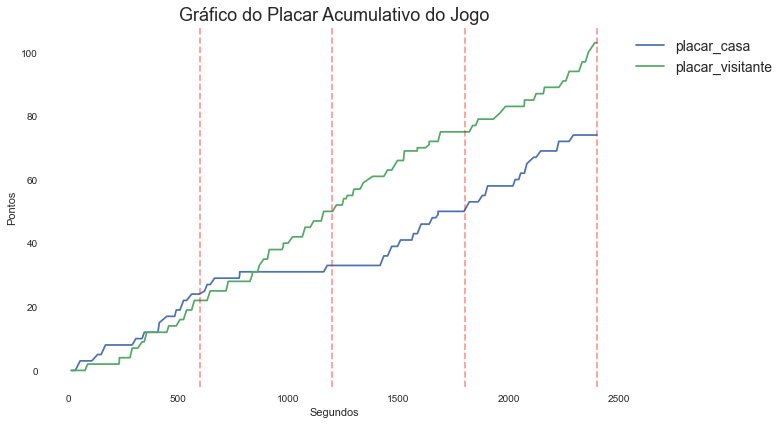

In [33]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(11,6))
tempo = pontuacao['Tempo']
pontuacao1 = pontuacao['placar_casa']
pontuacao2 = pontuacao['placar_visitante']
plt.plot(tempo, pontuacao1, label='placar_casa')
plt.plot(tempo, pontuacao2, label='placar_visitante')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.title('Gráfico do Placar Acumulativo do Jogo', fontsize=18)
plt.ylabel('Pontos')
plt.xlabel('Segundos')
plt.tight_layout()
plt.savefig('RELATORIO/teste.jpeg', format='jpg')

# Análise da Posse de Bola dos times

In [34]:
posse_bola = df[(df['Indicador'] == '3_Pts_C') | (df['Indicador'] == '3_Pts_T') | 
                (df['Indicador'] == '2_Pts_C') | (df['Indicador'] == '2_Pts_T') |
                (df['Indicador'] == 'LL_Pts_C') | (df['Indicador'] == 'LL_Pts_T') |
                (df['Indicador'] == 'ER') | (df['Indicador'] == 'FC_O')|                
                (df['Indicador'] == 'EN') | (df['Indicador'] == 'fim_partida')]

In [35]:
# estamos invertendo os valores para deixar parecido com o jogo
posse_bola = posse_bola[::-1]
posse_bola.reset_index(drop=True, inplace=True)
posse_bola

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante,diferenca_placar_absoluto
0,1,15,0,0,BSB,2_Pts_T,Laster,0,0,0
1,1,33,0,0,FLA,3_Pts_T,Hettsheimeir,0,0,0
2,1,55,3,0,BSB,3_Pts_C,J Socas,3,-3,3
3,1,77,3,0,FLA,2_Pts_T,Chuzito,3,-3,3
4,1,89,3,2,FLA,2_Pts_C,Hettsheimeir,1,-1,1
...,...,...,...,...,...,...,...,...,...,...
190,4,2361,74,100,FLA,3_Pts_C,Balbi,-26,26,26
191,4,2384,74,100,BSB,ER,Laster,-26,26,26
192,4,2390,74,103,FLA,3_Pts_C,Balbi,-29,29,29
193,4,2396,74,103,BSB,2_Pts_T,P Costa,-29,29,29


In [36]:
lstime_b = [[]]
lstime_a = [[]]

for a in posse_bola.itertuples():
    if a.Time not in [sigla_time_b]:
        idx = a.Index - 1
        if idx >= 0:
            cc = posse_bola.loc[idx]
            lss = [
                cc.Time,
                cc.Tempo,
                cc.Indicador,
                cc.diferenca_placar_casa,
                cc.diferenca_placar_visitante,
                cc.diferenca_placar_absoluto
            ]
            lstime_b.append(lss)
        else:
            pass

    if a.Time not in [sigla_time_a]:
        idx = a.Index - 1
        if idx >= 0:
            cc = posse_bola.loc[idx]
            lss = [
                cc.Time,
                cc.Tempo,
                cc.Indicador,
                cc.diferenca_placar_casa,
                cc.diferenca_placar_visitante,
                cc.diferenca_placar_absoluto
            ]
            lstime_a.append(lss)
        else:
            pass

In [37]:
df_time_b = pd.DataFrame(
    lstime_b, columns=["Time", "Tempo", "Indicador", "dif_casa", "dif_visita", "dif_abs"])

In [38]:
df_time_b.dropna(how="any", inplace=True, axis="index")
df_time_b = df_time_b[df_time_b.Time.str.contains(sigla_time_b)]

In [39]:
df_time_a = pd.DataFrame(
    lstime_a, columns=["Time", "Tempo", "Indicador", "dif_casa", "dif_visita", "dif_abs"])

In [40]:
df_time_a.dropna(how="any", inplace=True, axis="index")
df_time_a = df_time_a[df_time_a.Time.str.contains(sigla_time_a)]

In [41]:
posse_de_bola = pd.concat([df_time_b, df_time_a], ignore_index=True)
posse_de_bola.sort_values(by="Tempo", inplace=True)
posse_de_bola.reset_index(inplace=True, drop=True)

In [42]:
posse_de_bola["Tempo_Fim"] = posse_de_bola["Tempo"]
tempo = posse_de_bola["Tempo"].diff()
tempo.loc[0] = posse_de_bola["Tempo"].loc[0]
posse_de_bola["Tempo"] = tempo
posse_de_bola

,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim
0,BSB,15.0,2_Pts_T,0.0,0.0,0.0,15.0
1,FLA,18.0,3_Pts_T,0.0,0.0,0.0,33.0
2,BSB,22.0,3_Pts_C,3.0,-3.0,3.0,55.0
3,FLA,34.0,2_Pts_C,1.0,-1.0,1.0,89.0
4,BSB,19.0,3_Pts_T,1.0,-1.0,1.0,108.0
...,...,...,...,...,...,...,...
156,BSB,15.0,2_Pts_T,-23.0,23.0,23.0,2348.0
157,FLA,13.0,3_Pts_C,-26.0,26.0,26.0,2361.0
158,BSB,23.0,ER,-26.0,26.0,26.0,2384.0
159,FLA,6.0,3_Pts_C,-29.0,29.0,29.0,2390.0


In [43]:
posse_bola = posse_de_bola.copy()

In [44]:
posse_de_bola.to_csv('tempo2.csv')

# Análises da posse de bola

In [45]:
lu_time_a = posse_de_bola
lu_time_a['Time_Novo'] = 0

In [46]:
for x in range(len(posse_de_bola)):
    if lu_time_a['Time'][x] == sigla_time_a:
        lu_time_a.loc[x, 'Time_Novo'] = lu_time_a['Tempo'][x]
    else:
        pass

In [47]:
lu_time_a

,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,Time_Novo
0,BSB,15.0,2_Pts_T,0.0,0.0,0.0,15.0,15.0
1,FLA,18.0,3_Pts_T,0.0,0.0,0.0,33.0,0.0
2,BSB,22.0,3_Pts_C,3.0,-3.0,3.0,55.0,22.0
3,FLA,34.0,2_Pts_C,1.0,-1.0,1.0,89.0,0.0
4,BSB,19.0,3_Pts_T,1.0,-1.0,1.0,108.0,19.0
...,...,...,...,...,...,...,...,...
156,BSB,15.0,2_Pts_T,-23.0,23.0,23.0,2348.0,15.0
157,FLA,13.0,3_Pts_C,-26.0,26.0,26.0,2361.0,0.0
158,BSB,23.0,ER,-26.0,26.0,26.0,2384.0,23.0
159,FLA,6.0,3_Pts_C,-29.0,29.0,29.0,2390.0,0.0


In [48]:
grafico_posse_time1 = lu_time_a
grafico_posse_time1.reset_index(inplace=True)

In [49]:
grafico_posse_time1

,index,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,Time_Novo
0,0,BSB,15.0,2_Pts_T,0.0,0.0,0.0,15.0,15.0
1,1,FLA,18.0,3_Pts_T,0.0,0.0,0.0,33.0,0.0
2,2,BSB,22.0,3_Pts_C,3.0,-3.0,3.0,55.0,22.0
3,3,FLA,34.0,2_Pts_C,1.0,-1.0,1.0,89.0,0.0
4,4,BSB,19.0,3_Pts_T,1.0,-1.0,1.0,108.0,19.0
...,...,...,...,...,...,...,...,...,...
156,156,BSB,15.0,2_Pts_T,-23.0,23.0,23.0,2348.0,15.0
157,157,FLA,13.0,3_Pts_C,-26.0,26.0,26.0,2361.0,0.0
158,158,BSB,23.0,ER,-26.0,26.0,26.0,2384.0,23.0
159,159,FLA,6.0,3_Pts_C,-29.0,29.0,29.0,2390.0,0.0


In [50]:
x = grafico_posse_time1['index']
my_xticks = x
frequency = 10

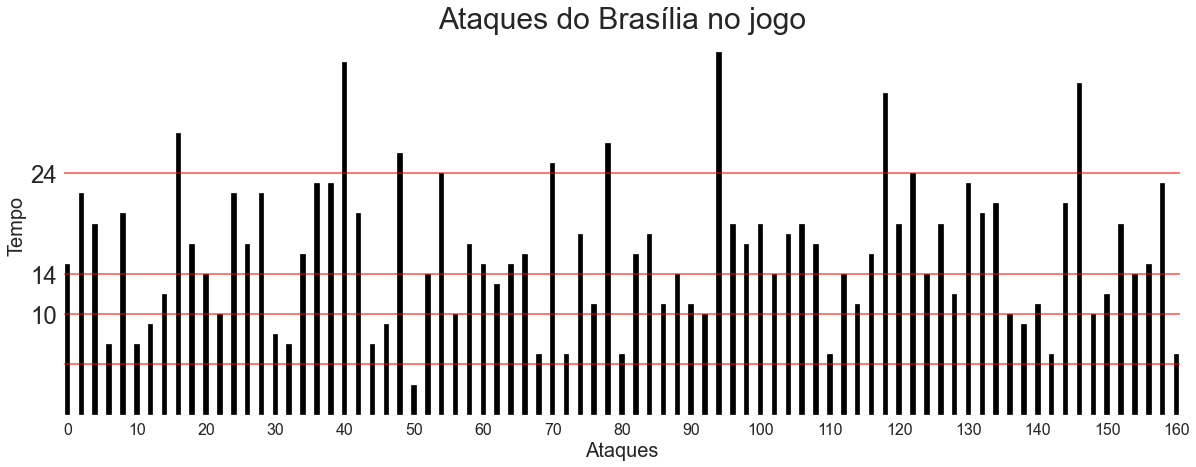

In [51]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(20,7))
sns.barplot(x='index', y='Time_Novo', data=grafico_posse_time1, color='black')
plt.title(f'Ataques do {nome_time_casa} no jogo', fontsize=30)
plt.yticks([10,14,24], fontsize=24)
plt.ylabel('Tempo', fontsize=20)
plt.xlabel('Ataques', fontsize=20)
plt.xticks(x[::frequency], my_xticks[::frequency], fontsize=16)
plt.axhline(24, color='red', alpha=0.6, label = '24 segundos')
plt.axhline(14, color='red', alpha=0.6, label = '14 segundos')
plt.axhline(10, color='red', alpha=0.6, label = '10 segundos')
plt.axhline(5, color='red', alpha=0.6, label = '5 segundos')
# plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), prop={'size':14})
plt.savefig('RELATORIO/teste3.png', format='png')

In [52]:
lu_time_b = posse_de_bola
lu_time_b['Time_Novo'] = 0

In [53]:
for x in range(len(posse_de_bola)):
    if lu_time_b['Time'][x] == sigla_time_b:
        lu_time_b.loc[x,'Time_Novo'] = lu_time_b['Tempo'][x]
    else:
        pass

In [54]:
lu_time_b

,index,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,Time_Novo
0,0,BSB,15.0,2_Pts_T,0.0,0.0,0.0,15.0,0.0
1,1,FLA,18.0,3_Pts_T,0.0,0.0,0.0,33.0,18.0
2,2,BSB,22.0,3_Pts_C,3.0,-3.0,3.0,55.0,0.0
3,3,FLA,34.0,2_Pts_C,1.0,-1.0,1.0,89.0,34.0
4,4,BSB,19.0,3_Pts_T,1.0,-1.0,1.0,108.0,0.0
...,...,...,...,...,...,...,...,...,...
156,156,BSB,15.0,2_Pts_T,-23.0,23.0,23.0,2348.0,0.0
157,157,FLA,13.0,3_Pts_C,-26.0,26.0,26.0,2361.0,13.0
158,158,BSB,23.0,ER,-26.0,26.0,26.0,2384.0,0.0
159,159,FLA,6.0,3_Pts_C,-29.0,29.0,29.0,2390.0,6.0


In [55]:
grafico_posse_time2 = lu_time_b
grafico_posse_time2.reset_index(inplace=True)

In [56]:
grafico_posse_time2

,level_0,index,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,Time_Novo
0,0,0,BSB,15.0,2_Pts_T,0.0,0.0,0.0,15.0,0.0
1,1,1,FLA,18.0,3_Pts_T,0.0,0.0,0.0,33.0,18.0
2,2,2,BSB,22.0,3_Pts_C,3.0,-3.0,3.0,55.0,0.0
3,3,3,FLA,34.0,2_Pts_C,1.0,-1.0,1.0,89.0,34.0
4,4,4,BSB,19.0,3_Pts_T,1.0,-1.0,1.0,108.0,0.0
...,...,...,...,...,...,...,...,...,...,...
156,156,156,BSB,15.0,2_Pts_T,-23.0,23.0,23.0,2348.0,0.0
157,157,157,FLA,13.0,3_Pts_C,-26.0,26.0,26.0,2361.0,13.0
158,158,158,BSB,23.0,ER,-26.0,26.0,26.0,2384.0,0.0
159,159,159,FLA,6.0,3_Pts_C,-29.0,29.0,29.0,2390.0,6.0


In [57]:
x2 = grafico_posse_time2['index']
my_xticks2 = x2
frequency2 = 10

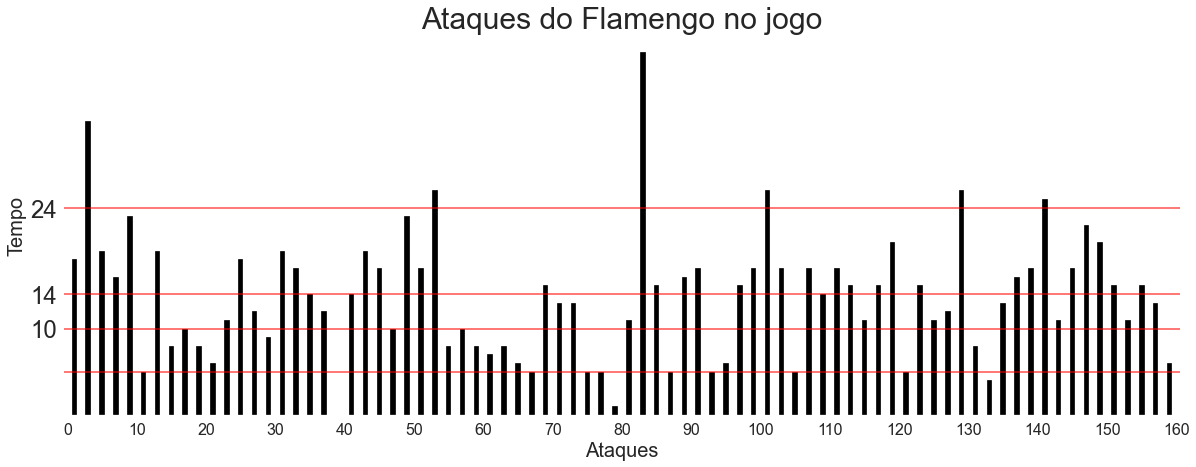

In [58]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(20,7))
sns.barplot(x='index', y='Time_Novo', data=grafico_posse_time2, color='black')
plt.title(f'Ataques do {nome_time_fora} no jogo', fontsize=30)
plt.yticks([10,14,24], fontsize=24)
plt.ylabel('Tempo', fontsize=20)
plt.xlabel('Ataques', fontsize=20)
plt.xticks(x2[::frequency2], my_xticks2[::frequency2], fontsize=16)
plt.axhline(24, color='red', alpha=0.6, label = '24 segundos')
plt.axhline(14, color='red', alpha=0.6, label = '14 segundos')
plt.axhline(10, color='red', alpha=0.6, label = '10 segundos')
plt.axhline(5, color='red', alpha=0.6, label = '5 segundos')
# plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), prop={'size':14})
plt.savefig('RELATORIO/teste4.png', format='png')

# Análises descritiva da posse de bola

In [59]:
soma_a = df_time_a['Indicador'].value_counts().sum()
soma_b = df_time_b['Indicador'].value_counts().sum()

In [60]:
contagem = pd.DataFrame()
contagem = contagem.append(df_time_a['Indicador'].value_counts(), ignore_index=True)
contagem = contagem.append(df_time_b['Indicador'].value_counts(), ignore_index=True)
contagem

,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,ER,LL_Pts_C,EN,LL_Pts_T
0,18.0,14.0,11.0,18.0,18.0,2.0,NaN,NaN
1,19.0,6.0,16.0,18.0,12.0,6.0,2.0,1.0


In [61]:
# Esses indicadores podem não aparecer no jogo 
# dessa maneira eu vou criar um if e acrescentar 
valores_coluna = []
for i in contagem:
    valores_coluna.append(i)
    
if 'EN' not in valores_coluna:
    contagem['EN'] = [0.0, 0.0]
if 'LL_Pts_T' not in valores_coluna:
    contagem['LL_Pts_T'] = [0.0, 0.0]
if 'LL_Pts_C' not in valores_coluna:
    contagem['LL_Pts_C'] = [0.0, 0.0]
# substituir os valores NAN por 0(zero)
contagem.fillna(0, inplace=True)
contagem

,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,ER,LL_Pts_C,EN,LL_Pts_T
0,18.0,14.0,11.0,18.0,18.0,2.0,0.0,0.0
1,19.0,6.0,16.0,18.0,12.0,6.0,2.0,1.0


In [62]:
contagem.loc[0, '2_Pts_C'] = contagem['2_Pts_C'][0] + contagem['EN'][0]
contagem.loc[1, '2_Pts_C'] = contagem['2_Pts_C'][1] + contagem['EN'][1]

In [63]:
contagem.drop('EN', inplace=True, axis=1)
contagem

,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,ER,LL_Pts_C,LL_Pts_T
0,18.0,14.0,11.0,18.0,18.0,2.0,0.0
1,21.0,6.0,16.0,18.0,12.0,6.0,1.0


In [64]:
contagem.rename(columns={"2_Pts_T": "2_Pts_E", "3_Pts_T": "3_Pts_E", "LL_Pts_T": "LL_Pts_E"}, inplace=True)

In [65]:
contagem['2_Pts_T'] = contagem['2_Pts_C'] + contagem['2_Pts_E']
contagem['3_Pts_T'] = contagem['3_Pts_C'] + contagem['3_Pts_E']
contagem['LL_Pts_T'] = contagem['LL_Pts_C'] + contagem['LL_Pts_E']

In [66]:
contagem['Time'] = [sigla_time_a, sigla_time_b]
contagem['posse'] = [soma_a, soma_b]
contagem['%2_Pts_C'] = [round((contagem['2_Pts_C'][0]/soma_a)*100), round((contagem['2_Pts_C'][1]/soma_b)*100)]
contagem['%2_Pts_E'] = [round((contagem['2_Pts_E'][0]/soma_a)*100), round((contagem['2_Pts_E'][1]/soma_b)*100)]
contagem['%3_Pts_C'] = [round((contagem['3_Pts_C'][0]/soma_a)*100), round((contagem['3_Pts_C'][1]/soma_b)*100)]
contagem['%3_Pts_E'] = [round((contagem['3_Pts_E'][0]/soma_a)*100), round((contagem['3_Pts_E'][1]/soma_b)*100)]
contagem['%LL_Pts_C'] = [round((contagem['LL_Pts_C'][0]/soma_a)*100), round((contagem['LL_Pts_C'][1]/soma_b)*100)]
contagem['%LL_Pts_E'] = [round((contagem['LL_Pts_E'][0]/soma_a)*100), round((contagem['LL_Pts_E'][1]/soma_b)*100)]
contagem['Tempo_de_posse'] = [(round(posse_de_bola.loc[posse_de_bola['Time'] == sigla_time_a].Tempo.sum()/60)),
                              (round(posse_de_bola.loc[posse_de_bola['Time'] == sigla_time_b].Tempo.sum()/60))]
contagem['Ataques/min'] = [(round(contagem['posse'][0]/contagem['Tempo_de_posse'][0], 2)),
                           (round(contagem['posse'][1]/contagem['Tempo_de_posse'][1], 2))]

In [67]:
contagem['posse'][0]/contagem['Tempo_de_posse'][0]

3.6818181818181817

In [68]:
contagem = contagem[['Time', 'posse', 'Tempo_de_posse', 'Ataques/min',
                     '2_Pts_C', '2_Pts_E', '2_Pts_T',
                     '3_Pts_C', '3_Pts_E', '3_Pts_T',
                     'LL_Pts_C', 'LL_Pts_E', 'LL_Pts_T',
                     '%2_Pts_C', '%2_Pts_E', '%3_Pts_C',
                     '%3_Pts_E', '%LL_Pts_C', '%LL_Pts_E']]
contagem

,Time,posse,Tempo_de_posse,Ataques/min,2_Pts_C,2_Pts_E,2_Pts_T,3_Pts_C,3_Pts_E,3_Pts_T,LL_Pts_C,LL_Pts_E,LL_Pts_T,%2_Pts_C,%2_Pts_E,%3_Pts_C,%3_Pts_E,%LL_Pts_C,%LL_Pts_E
0,BSB,81,22.0,3.68,18.0,14.0,32.0,11.0,18.0,29.0,2.0,0.0,2.0,22.0,17.0,14.0,22.0,2.0,0.0
1,FLA,80,18.0,4.44,21.0,6.0,27.0,16.0,18.0,34.0,6.0,1.0,7.0,26.0,8.0,20.0,22.0,8.0,1.0


In [69]:
posse_de_bola_b = posse_de_bola[posse_de_bola['Time'] == sigla_time_b]
v1 = len(posse_de_bola_b[posse_de_bola_b['Tempo'] <= 5])
v2 = len(posse_de_bola_b[(posse_de_bola_b['Tempo'] > 5) & (posse_de_bola_b['Tempo'] <= 10)])
v3 = len(posse_de_bola_b[(posse_de_bola_b['Tempo'] > 10) & (posse_de_bola_b['Tempo'] <= 14)])
v4 = len(posse_de_bola_b[(posse_de_bola_b['Tempo'] > 14) & (posse_de_bola_b['Tempo'] <= 24)])
v5 = len(posse_de_bola_b[posse_de_bola_b['Tempo'] > 24])
valores_b = {f'{sigla_time_b}':(v1, v2, v3, v4, v5)}
valores_b

{'FLA': (11, 15, 16, 32, 6)}

In [70]:
posse_de_bola_a = posse_de_bola[posse_de_bola['Time'] == sigla_time_a]
v1 = len(posse_de_bola_a[posse_de_bola_a['Tempo'] <= 5])
v2 = len(posse_de_bola_a[(posse_de_bola_a['Tempo'] > 5) & (posse_de_bola_a['Tempo'] <= 10)])
v3 = len(posse_de_bola_a[(posse_de_bola_a['Tempo'] > 10) & (posse_de_bola_a['Tempo'] <= 14)])
v4 = len(posse_de_bola_a[(posse_de_bola_a['Tempo'] > 14) & (posse_de_bola_a['Tempo'] <= 24)])
v5 = len(posse_de_bola_a[posse_de_bola_a['Tempo'] > 24])
valores_a = {f'{sigla_time_a}':(v1, v2, v3, v4, v5)}
valores_a

{'BSB': (1, 19, 16, 37, 8)}

In [71]:
# tempo de ataque separado por cada ataque 
# juntar valores de A e valores de B
valores_a.update(valores_b)
tempos = ('<=5', '>5<=10', '>10<=14', '>14<=24', '>24')
ataques = pd.DataFrame(data=valores_a, index=tempos)

In [72]:
ataques

,BSB,FLA
<=5,1,11
>5<=10,19,15
>10<=14,16,16
>14<=24,37,32
>24,8,6


In [73]:
posse_bola

,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim
0,BSB,15.0,2_Pts_T,0.0,0.0,0.0,15.0
1,FLA,18.0,3_Pts_T,0.0,0.0,0.0,33.0
2,BSB,22.0,3_Pts_C,3.0,-3.0,3.0,55.0
3,FLA,34.0,2_Pts_C,1.0,-1.0,1.0,89.0
4,BSB,19.0,3_Pts_T,1.0,-1.0,1.0,108.0
...,...,...,...,...,...,...,...
156,BSB,15.0,2_Pts_T,-23.0,23.0,23.0,2348.0
157,FLA,13.0,3_Pts_C,-26.0,26.0,26.0,2361.0
158,BSB,23.0,ER,-26.0,26.0,26.0,2384.0
159,FLA,6.0,3_Pts_C,-29.0,29.0,29.0,2390.0


#  Gráfico da diferença da placar

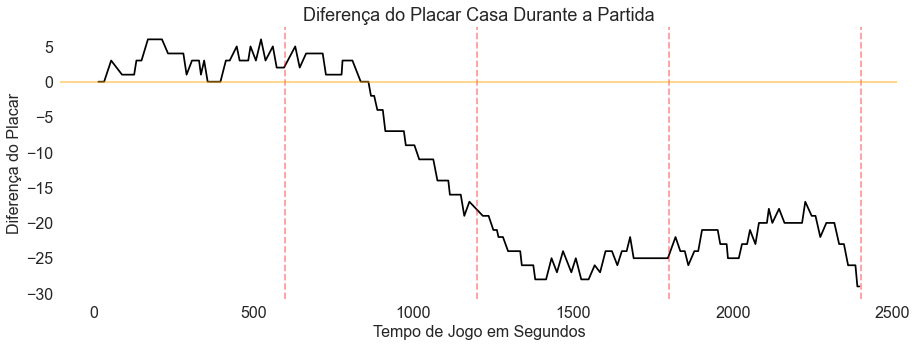

In [74]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(posse_bola['Tempo_Fim'], posse_bola['dif_casa'], color='black')
plt.title('Diferença do Placar Casa Durante a Partida', fontsize=18)
plt.ylabel('Diferença do Placar', fontsize=16)
plt.xlabel('Tempo de Jogo em Segundos', fontsize=16)
plt.yticks(fontsize= 16)
plt.xticks(fontsize= 16)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in quartos:
    plt.axvline(x, color='red', label=posse_bola.index, linestyle='--', alpha=0.4)
plt.axhline(0, color='orange', label=posse_bola.index, alpha=0.5)

# Analisar os períodos positivos dos times

In [75]:
# Utilizando a diferença do placar entre casa e visitante, aplicando diff (diferença entre as linhas) 
# e usando seu valor absoluto (abs())
# nós podemos encontrar o valor de cada indicador técnico 
posse_bola["pontuacao"] = posse_bola["dif_casa"].diff()
posse_bola["pontuacao"] = posse_bola["pontuacao"].apply(lambda x: abs(x))

In [76]:
# como o primeiro valor some quando fazemos a diff e esse primeiro valor é importante pq é o primeiro ponto, nós adicionamos ele
novo_valor = posse_bola["dif_casa"][0]
posse_bola.loc[0, 'pontuacao'] = abs(novo_valor)

In [77]:
# questão de precaução 
posse_bola.reset_index(inplace=True, drop=True)

# Dois Tipos de Posse
## Primeira

In [78]:
# dois tipos de posse de bola 
# 1 o time que teve a primeira posse de bola
posse_bola_um = posse_bola.copy()

In [79]:
# avaliar quem é o primeiro a ter a posse de bola para poder se encaixar com a função das posses
segunda_posse = posse_bola.Time[1]
segunda_posse

'FLA'

In [80]:
# Perguntar para o thomaz pq está errado
for i in range(len(posse_bola_um)):
    if posse_bola_um.Time[i] == segunda_posse:
        posse_bola_um.loc[i, 'pontuacao'] = posse_bola_um.pontuacao[i] * -1
    else:
        pass

In [81]:
# posse_bola.to_csv('tempo2.csv')
posse_bola_um

,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,pontuacao
0,BSB,15.0,2_Pts_T,0.0,0.0,0.0,15.0,0.0
1,FLA,18.0,3_Pts_T,0.0,0.0,0.0,33.0,-0.0
2,BSB,22.0,3_Pts_C,3.0,-3.0,3.0,55.0,3.0
3,FLA,34.0,2_Pts_C,1.0,-1.0,1.0,89.0,-2.0
4,BSB,19.0,3_Pts_T,1.0,-1.0,1.0,108.0,0.0
...,...,...,...,...,...,...,...,...
156,BSB,15.0,2_Pts_T,-23.0,23.0,23.0,2348.0,0.0
157,FLA,13.0,3_Pts_C,-26.0,26.0,26.0,2361.0,-3.0
158,BSB,23.0,ER,-26.0,26.0,26.0,2384.0,0.0
159,FLA,6.0,3_Pts_C,-29.0,29.0,29.0,2390.0,-3.0


In [82]:
len(posse_bola_um)

161

In [83]:
def par_impar(posse_bola):
    # precisamos fazer dois estilos de DataFrame 
    # par = não influência no time que teve a primeira posse de bola
    # par = influência no time que teve a segunda posse de bola
    # inpar = não influência no time que teve a segunda posse de bola
    # inpar = influência no time que teve a primeira posse de bola
    if (len(posse_bola)%2 == 0):
        print(f"Par: {len(posse_bola)}")
        return posse_bola
    else:
        print(f"Impar: {len(posse_bola)}")
        d = {"Time": [0], "Tempo": [0], "Indicador":[0], "dif_casa":[0], "dif_visita":[0], "dif_abs":[0],
         "Tempo_Fim":[0], "pontuacao":[0]}
        a = pd.DataFrame(data=d)
        a.pontuacao = a.pontuacao.astype('float64')
        posse_bola = pd.concat([posse_bola, a], ignore_index=True)
    return posse_bola

In [84]:
posse_bola_um = par_impar(posse_bola_um)
posse_bola_um

Impar: 161


,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,pontuacao
0,BSB,15.0,2_Pts_T,0.0,0.0,0.0,15.0,0.0
1,FLA,18.0,3_Pts_T,0.0,0.0,0.0,33.0,-0.0
2,BSB,22.0,3_Pts_C,3.0,-3.0,3.0,55.0,3.0
3,FLA,34.0,2_Pts_C,1.0,-1.0,1.0,89.0,-2.0
4,BSB,19.0,3_Pts_T,1.0,-1.0,1.0,108.0,0.0
...,...,...,...,...,...,...,...,...
157,FLA,13.0,3_Pts_C,-26.0,26.0,26.0,2361.0,-3.0
158,BSB,23.0,ER,-26.0,26.0,26.0,2384.0,0.0
159,FLA,6.0,3_Pts_C,-29.0,29.0,29.0,2390.0,-3.0
160,BSB,6.0,2_Pts_T,-29.0,29.0,29.0,2396.0,0.0


In [85]:
# Verificação das posses de bola pulando dois em dois
def periodo_potencial(posse_bola):
    indx_potencial_periodo = []
    for i in range(0, len(posse_bola), 2):
        # ache onde teve vantagem na pontuação
        # Time A fez ponto, mas o time B não fez
        if (posse_bola.pontuacao[i] >= 2) & (posse_bola.pontuacao[i+1] >= -1):
            indx_potencial_periodo.append(i)
        # ache onde teve pontuação dos dois times
        # Time A fez ponto e o time B fez ponto
        # Elimina a primeira posse de bola com essa condição
        elif i > 2:
            if (posse_bola.pontuacao[i] >= 2) & (posse_bola.pontuacao[i+1] <= -1):
                # Caso encontre uma troca de pontuação, nós precisamos avaliar outro critério
                # Caso apareça no ataque anterior uma vantagem na pontuação. PEGUE!
                # Come essa função está avaliando o primeiro time que atacou,
                # o time ao realizar um ponto estará na frente do placar anterior
                if (posse_bola.pontuacao[i-2] >= 2) & (posse_bola.pontuacao[i-1] >= -1):
                    indx_potencial_periodo.append(i)
                else:
                    pass
        else:
            pass
    # para ajudar no passo de verificação na separação dos períodos positivos eu criei um break 
    # o break consiste em acrescentando o valor zero (0) no final da lista
    indx_potencial_periodo.append(0)
    return indx_potencial_periodo

In [86]:
indx_potencial_periodo = periodo_potencial(posse_bola_um)

In [87]:
indx_potencial_periodo

[6,
 8,
 18,
 26,
 28,
 42,
 50,
 106,
 108,
 112,
 114,
 126,
 128,
 136,
 138,
 140,
 142,
 152,
 0]

primeira coisa que precisamos analisar é 
- Identificar sequencia da pontuação. Precisa no minimo uma dupla de ataques (2, 2)
- Se essa sequencia apresenta uma pontuação de mais de 4 pontos

In [88]:
def identificardor_periodo_positivo(indx_potencial_periodo, posse_bola):
    # Primeiro passo é fazer a diferença entre cada periodo identificado
    dif = np.diff(indx_potencial_periodo)
    resultado = []
    periodo = []
    # Depois precisamos encontra quais apresentão ataques consecutivos (2)
    # localizados os ataques, vamos agrupar os indxs e geramos periodos
    for i, j in zip(dif, range(len(dif))):
    # print(i)
        if i == 2:
            resultado.append(indx_potencial_periodo[j])
            resultado.append(indx_potencial_periodo[j+1])
        else:
            periodo.append(sorted(set(resultado)))
            resultado = []
    periodo_positivo = []
    # depois de agrupa-los, nós identificamos quem apresenta valores nos períodos 
    for i in periodo:
        if any(i):
            # para que sejam considerados periodos positivos utilizamos uma pontuação maior que 4 pontos no período 
            if sum(posse_bola.loc[i, 'pontuacao']) >= 4:
                periodo_positivo.append(i)
            else:
                pass
        else:
            pass
    # retorna os períodos positivos do time
    return periodo_positivo

In [89]:
periodo_positivo = identificardor_periodo_positivo(indx_potencial_periodo, posse_bola_um)
periodo_positivo

[[6, 8], [26, 28], [106, 108], [112, 114], [126, 128], [136, 138, 140, 142]]

In [90]:
segunda_posse

'FLA'

In [91]:
sigla_time_a

'BSB'

In [92]:
# Colocar nos gráficos os periodos
# time A
segmento = [[]]
# Time B
segmento_dois = [[]]

In [93]:
# localizar o tempo de inicio e tempo final do periodo
# No caso precisamos pegar o primeiro indx e subtrair por 1 (indx-1), assim podemos ter a posse completa
# até a realização do ponto 
# Localizar o último indx que representa o final do período positivo
if segunda_posse == sigla_time_a:
    positivo_inicio_time_b = []
    positivo_fim_time_b = []
    for i in periodo_positivo:
        if i[0] == 0:
            positivo_inicio_time_b.append(posse_bola_um.loc[i[0], 'Tempo_Fim'])
            positivo_fim_time_b.append(posse_bola_um.loc[i[len(i)-1], 'Tempo_Fim'])
            segmento_dois.append([posse_bola_um.loc[i[0], 'Tempo_Fim'],posse_bola_um.loc[i[len(i)-1], 'Tempo_Fim']])
        else:
            positivo_inicio_time_b.append(posse_bola_um.loc[i[0]-1, 'Tempo_Fim'])
            positivo_fim_time_b.append(posse_bola_um.loc[i[len(i)-1], 'Tempo_Fim'])
            segmento_dois.append([posse_bola_um.loc[i[0]-1, 'Tempo_Fim'],posse_bola_um.loc[i[len(i)-1], 'Tempo_Fim']])
    print('Time B')
    print(positivo_inicio_time_b)
    print(positivo_fim_time_b)
else:
    positivo_inicio_time_a = []
    positivo_fim_time_a =  []
    for i in periodo_positivo:
        if i[0] == 0:
            positivo_inicio_time_a.append(posse_bola_um.loc[i[0], 'Tempo_Fim'])
            positivo_fim_time_a.append(posse_bola_um.loc[i[len(i)-1], 'Tempo_Fim'])
            segmento.append([posse_bola_um.loc[i[0], 'Tempo_Fim'],posse_bola_um.loc[i[len(i)-1], 'Tempo_Fim']])
        else:
            positivo_inicio_time_a.append(posse_bola_um.loc[i[0]-1, 'Tempo_Fim'])
            positivo_fim_time_a.append(posse_bola_um.loc[i[len(i)-1], 'Tempo_Fim'])
            segmento.append([posse_bola_um.loc[i[0]-1, 'Tempo_Fim'],posse_bola_um.loc[i[len(i)-1], 'Tempo_Fim']])
    print('Time A')
    print(positivo_inicio_time_a)
    print(positivo_fim_time_a)

Time A
[127.0, 397.0, 1549.0, 1639.0, 1861.0, 2019.0]
[170.0, 448.0, 1602.0, 1679.0, 1904.0, 2113.0]


### Segundo Time

In [94]:
# 2 o time que teve a segunda posse de bola
posse_bola_dois = posse_bola.copy()
posse_bola_dois.drop([0], inplace=True)
posse_bola_dois.reset_index(drop=True, inplace=True)

In [95]:
# avaliar quem é o primeiro a ter a posse de bola para poder se encaixar com a função das posses
segunda_posse_dois = posse_bola_dois.Time[1]
segunda_posse_dois

'BSB'

In [96]:
# Perguntar para o thomaz pq está errado
for i in range(len(posse_bola_dois)):
    if posse_bola_dois.Time[i] == segunda_posse_dois:
        posse_bola_dois.loc[i, 'pontuacao'] = posse_bola_dois.pontuacao[i] * -1
    else:
        pass

In [97]:
posse_bola

,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,pontuacao
0,BSB,15.0,2_Pts_T,0.0,0.0,0.0,15.0,0.0
1,FLA,18.0,3_Pts_T,0.0,0.0,0.0,33.0,0.0
2,BSB,22.0,3_Pts_C,3.0,-3.0,3.0,55.0,3.0
3,FLA,34.0,2_Pts_C,1.0,-1.0,1.0,89.0,2.0
4,BSB,19.0,3_Pts_T,1.0,-1.0,1.0,108.0,0.0
...,...,...,...,...,...,...,...,...
156,BSB,15.0,2_Pts_T,-23.0,23.0,23.0,2348.0,0.0
157,FLA,13.0,3_Pts_C,-26.0,26.0,26.0,2361.0,3.0
158,BSB,23.0,ER,-26.0,26.0,26.0,2384.0,0.0
159,FLA,6.0,3_Pts_C,-29.0,29.0,29.0,2390.0,3.0


In [98]:
posse_bola_dois

,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,pontuacao
0,FLA,18.0,3_Pts_T,0.0,0.0,0.0,33.0,0.0
1,BSB,22.0,3_Pts_C,3.0,-3.0,3.0,55.0,-3.0
2,FLA,34.0,2_Pts_C,1.0,-1.0,1.0,89.0,2.0
3,BSB,19.0,3_Pts_T,1.0,-1.0,1.0,108.0,-0.0
4,FLA,19.0,ER,1.0,-1.0,1.0,127.0,0.0
...,...,...,...,...,...,...,...,...
155,BSB,15.0,2_Pts_T,-23.0,23.0,23.0,2348.0,-0.0
156,FLA,13.0,3_Pts_C,-26.0,26.0,26.0,2361.0,3.0
157,BSB,23.0,ER,-26.0,26.0,26.0,2384.0,-0.0
158,FLA,6.0,3_Pts_C,-29.0,29.0,29.0,2390.0,3.0


In [99]:
posse_bola_dois = par_impar(posse_bola_dois)
posse_bola_dois

Par: 160


,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,pontuacao
0,FLA,18.0,3_Pts_T,0.0,0.0,0.0,33.0,0.0
1,BSB,22.0,3_Pts_C,3.0,-3.0,3.0,55.0,-3.0
2,FLA,34.0,2_Pts_C,1.0,-1.0,1.0,89.0,2.0
3,BSB,19.0,3_Pts_T,1.0,-1.0,1.0,108.0,-0.0
4,FLA,19.0,ER,1.0,-1.0,1.0,127.0,0.0
...,...,...,...,...,...,...,...,...
155,BSB,15.0,2_Pts_T,-23.0,23.0,23.0,2348.0,-0.0
156,FLA,13.0,3_Pts_C,-26.0,26.0,26.0,2361.0,3.0
157,BSB,23.0,ER,-26.0,26.0,26.0,2384.0,-0.0
158,FLA,6.0,3_Pts_C,-29.0,29.0,29.0,2390.0,3.0


In [100]:
indx_potencial_periodo_dois = periodo_potencial(posse_bola_dois)

In [101]:
periodo_positivo_dois = identificardor_periodo_positivo(indx_potencial_periodo_dois, posse_bola_dois)
periodo_positivo_dois

[[52, 54, 56, 58],
 [82, 84],
 [92, 94],
 [122, 124],
 [130, 132],
 [148, 150],
 [154, 156, 158]]

In [102]:
# localizar o tempo de inicio e tempo final do periodo
# No caso precisamos pegar o primeiro indx e subtrair por 1 (indx-1), assim podemos ter a posse completa
# até a realização do ponto 
# Localizar o último indx que representa o final do período positivo
if segunda_posse_dois == sigla_time_a:
    positivo_inicio_time_b = []
    positivo_fim_time_b = []
    for i in periodo_positivo_dois:
        if i[0] == 0:
            positivo_inicio_time_b.append(posse_bola_um.loc[i[0], 'Tempo_Fim'])
            positivo_fim_time_b.append(posse_bola_dois.loc[i[len(i)-1], 'Tempo_Fim'])
            segmento_dois.append([posse_bola_um.loc[i[0], 'Tempo_Fim'],posse_bola_dois.loc[i[len(i)-1], 'Tempo_Fim']])
        else:
            positivo_inicio_time_b.append(posse_bola_dois.loc[i[0]-1, 'Tempo_Fim'])
            positivo_fim_time_b.append(posse_bola_dois.loc[i[len(i)-1], 'Tempo_Fim'])
            segmento_dois.append([posse_bola_dois.loc[i[0]-1, 'Tempo_Fim'],posse_bola_dois.loc[i[len(i)-1], 'Tempo_Fim']])
    print('Time B')
    print(positivo_inicio_time_b)
    print(positivo_fim_time_b)
else:
    positivo_inicio_time_a = []
    positivo_fim_time_a =  []
    for i in periodo_positivo_dois:
        if i[0] == 0:
            positivo_inicio_time_a.append(posse_bola_um.loc[i[0], 'Tempo_Fim'])
            positivo_fim_time_a.append(posse_bola_dois.loc[i[len(i)-1], 'Tempo_Fim'])
            segmento.append([posse_bola_um.loc[i[0], 'Tempo_Fim'],posse_bola_dois.loc[i[len(i)-1], 'Tempo_Fim']])
        else:
            positivo_inicio_time_a.append(posse_bola_dois.loc[i[0]-1, 'Tempo_Fim'])
            positivo_fim_time_a.append(posse_bola_dois.loc[i[len(i)-1], 'Tempo_Fim'])
            segmento.append([posse_bola_dois.loc[i[0]-1, 'Tempo_Fim'],posse_bola_dois.loc[i[len(i)-1], 'Tempo_Fim']])
    print('Time A')
    print(positivo_inicio_time_a)
    print(positivo_fim_time_a)

Time B
[810.0, 1176.0, 1335.0, 1821.0, 1953.0, 2227.0, 2318.0]
[913.0, 1251.0, 1382.0, 1861.0, 1985.0, 2274.0, 2390.0]


# Gráfico dos períodos positivos

### períodos do times A e B

In [103]:
# Time A
del segmento[0]
segmento

[[127.0, 170.0],
 [397.0, 448.0],
 [1549.0, 1602.0],
 [1639.0, 1679.0],
 [1861.0, 1904.0],
 [2019.0, 2113.0]]

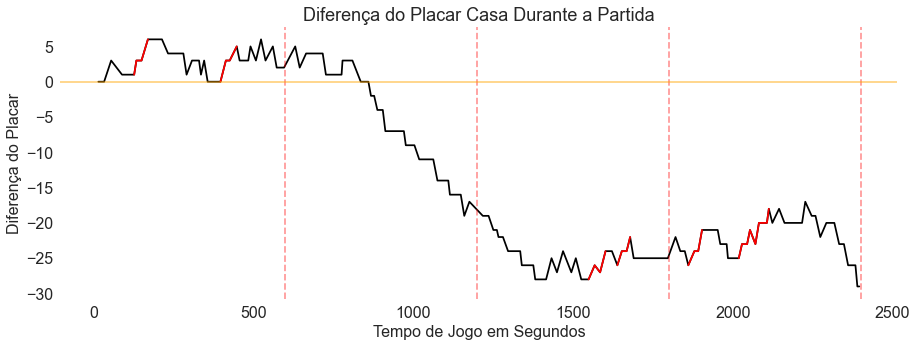

In [104]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(posse_bola['Tempo_Fim'], posse_bola['dif_casa'], color='black')
plt.title('Diferença do Placar Casa Durante a Partida', fontsize=18)
plt.ylabel('Diferença do Placar', fontsize=16)
plt.xlabel('Tempo de Jogo em Segundos', fontsize=16)
plt.yticks(fontsize= 16)
plt.xticks(fontsize= 16)
final_t = []
final_dif = []
for i in segmento:
    selecao = (posse_bola['Tempo_Fim'] >= i[0]) & (posse_bola['Tempo_Fim'] <= i[1])
    df_filtado_dif = posse_bola[selecao]['dif_casa']
    df_filtado_t = posse_bola[selecao]['Tempo_Fim']
    plt.plot(df_filtado_t, df_filtado_dif, color='red')
for x in quartos:
    plt.axvline(x, color='red', label=posse_bola.index, linestyle='--', alpha=0.4)
plt.axhline(0, color='orange', label=posse_bola.index, alpha=0.5)
plt.savefig('RELATORIO/teste1.jpeg', format='jpg')

In [105]:
# Time B
del segmento_dois[0]
segmento_dois

[[810.0, 913.0],
 [1176.0, 1251.0],
 [1335.0, 1382.0],
 [1821.0, 1861.0],
 [1953.0, 1985.0],
 [2227.0, 2274.0],
 [2318.0, 2390.0]]

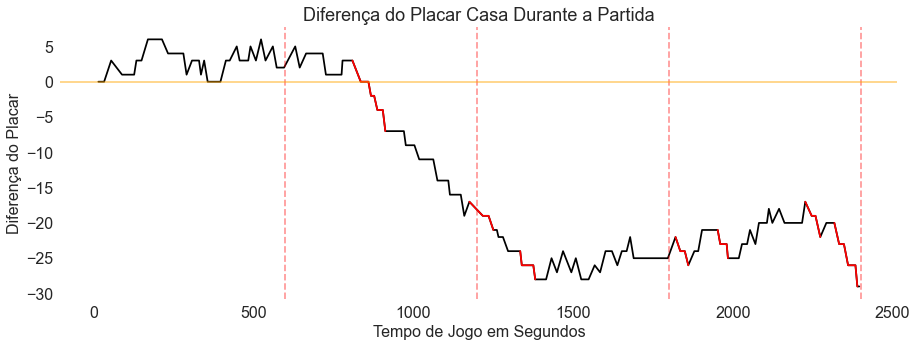

In [106]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(posse_bola['Tempo_Fim'], posse_bola['dif_casa'], color='black')
plt.title('Diferença do Placar Casa Durante a Partida', fontsize=18)
plt.ylabel('Diferença do Placar', fontsize=16)
plt.xlabel('Tempo de Jogo em Segundos', fontsize=16)
plt.yticks(fontsize= 16)
plt.xticks(fontsize= 16)
final_t = []
final_dif = []
for i in segmento_dois:
    selecao_dois = (posse_bola['Tempo_Fim'] >= i[0]) & (posse_bola['Tempo_Fim'] <= i[1])
    df_filtado_dif = posse_bola[selecao_dois]['dif_casa']
    df_filtado_t = posse_bola[selecao_dois]['Tempo_Fim']
    plt.plot(df_filtado_t, df_filtado_dif, label = 'diferença do placar', color='red')
for x in quartos:
    plt.axvline(x, color='red', label=posse_bola.index, linestyle='--', alpha=0.4)
plt.axhline(0, color='orange', label=posse_bola.index, alpha=0.5)
plt.savefig('RELATORIO/teste2.jpeg', format='jpg')

# Tabela de dados gerais

In [107]:
Tabela_Geral = df[['Time','Indicador','Nome']]

In [108]:
Tabela_Geral

,Time,Indicador,Nome
0,NaN,fim_partida,NaN
1,NaN,fim_quarto,NaN
2,BSB,2_Pts_T,P Costa
3,FLA,AS,Demétrio
4,FLA,3_Pts_C,Balbi
...,...,...,...
502,BSB,substituicao_entra,Diego
503,BSB,substituicao_entra,Laster
504,BSB,substituicao_entra,Caio Torres
505,BSB,substituicao_entra,Jefferson


In [109]:
Tabela_Geral_Time1 = Tabela_Geral[Tabela_Geral['Time'] == sigla_time_a]
Tabela_Geral_Time2 = Tabela_Geral[Tabela_Geral['Time'] == sigla_time_b]

In [110]:
Tabela_Geral_Time1

,Time,Indicador,Nome
2,BSB,2_Pts_T,P Costa
6,BSB,ER,Laster
7,BSB,FR,Jefferson
13,BSB,2_Pts_T,P Carvalho
16,BSB,substituicao_entra,P Carvalho
...,...,...,...
501,BSB,substituicao_entra,J Socas
502,BSB,substituicao_entra,Diego
503,BSB,substituicao_entra,Laster
504,BSB,substituicao_entra,Caio Torres


In [111]:
tabela_time1 = Tabela_Geral_Time1.groupby(['Nome', 'Indicador']).count()
tabela_time2 = Tabela_Geral_Time2.groupby(['Nome', 'Indicador']).count()

In [112]:
tabela_time1

Time
Nome        Indicador               
Brasília    RD                     5
            RO                     1
            tempo_tecnico          4
Caio Torres 2_Pts_C                1
            3_Pts_C                1
...                              ...
Samuel      FC_O                   1
            RD                     3
            RO                     1
            substituicao_entra     3
            substituicao_sai       3

[87 rows x 1 columns]

In [113]:
tabela_time2

Time
Nome  Indicador               
Balbi 3_Pts_C                4
      3_Pts_T                2
      AS                    11
      BR                     3
      ER                     2
...                        ...
Yago  FR                     2
      LL_Pts_C               2
      RD                     1
      substituicao_entra     4
      substituicao_sai       4

[114 rows x 1 columns]

In [114]:
tabela_time1_pivot = tabela_time1.pivot_table(index='Indicador',columns=['Nome'],aggfunc=sum, fill_value=0).T
tabela_time2_pivot = tabela_time2.pivot_table(index='Indicador',columns=['Nome'],aggfunc=sum, fill_value=0).T

In [115]:
tabela_time1_pivot

Indicador         2_Pts_C  2_Pts_T  3_Pts_C  3_Pts_T  AS  BR  ER  FC  FC_O  \
     Nome                                                                    
Time Brasília           0        0        0        0   0   0   0   0     0   
     Caio Torres        1        0        1        4   2   1   5   2     0   
     Diego              3        0        3        4   4   1   0   4     0   
     J Socas            1        2        1        2   4   1   3   1     0   
     Jefferson          1        1        2        3   5   0   3   2     0   
     Laster             0        3        4        6   0   1   4   1     0   
     Marcelão           4        4        0        0   0   0   1   2     0   
     P Carvalho         0        1        0        0   0   0   0   0     0   
     P Costa            0        1        0        0   0   0   0   0     0   
     Samuel             8        4        0        4   6   0   2   0     1   

Indicador         FR  LL_Pts_C  LL_Pts_T  RD  RO  TO  substituicao_entra  \
     Nome                                                                  
Time Brasília      0         0         0   5   1   0                   0   
     Caio Torres   1         0         0   3   0   0                   3   
     Diego         2         0         0   3   1   1                   2   
     J Socas       1         2         0   0   1   0                   3   
     Jefferson     2         0         0   2   1   0                   2   
     Laster        1         2         0   5   0   0                   5   
     Marcelão      1         1         1   4   2   0                   3   
     P Carvalho    0         0         0   0   0   0                   1   
     P Costa       0         0         0   0   0   0                   1   
     Samuel        0         0         0   3   1   0                   3   

Indicador         substituicao_sai  tempo_tecnico  
     Nome                                          
Time Brasília                    0              4  
     Caio Torres                 3              0  
     Diego                       3              0  
     J Socas                     4              0  
     Jefferson                   1              0  
     Laster                      3              0  
     Marcelão                    1              0  
     P Carvalho                  0              0  
     P Costa                     0              0  
     Samuel                      3              0

In [116]:
tabela_time2_pivot

Indicador          2_Pts_C  2_Pts_T  3_Pts_C  3_Pts_T  AS  BR  EN  ER  FC  \
     Nome                                                                   
Time Balbi               0        0        4        2  11   3   0   2   0   
     Chuzito             0        2        5        2   2   2   0   1   1   
     Demétrio            2        2        1        2   2   2   1   1   2   
     Flamengo            0        0        0        0   0   0   0   0   0   
     Hettsheimeir        4        2        2        5   0   2   0   3   0   
     Jhonatan            1        0        1        5   1   1   1   0   0   
     Mineiro             2        2        0        3   3   0   0   1   0   
     Olivinha            6        1        2        2   1   1   0   2   0   
     Pedro Nunes         0        0        1        3   3   0   0   0   1   
     R Rachel            3        0        0        1   0   0   0   1   0   
     Yago                2        0        0        3   9   2   0   1   2   

Indicador          FC_A  FC_O  FR  LL_Pts_C  LL_Pts_T  RD  RO  TO  \
     Nome                                                           
Time Balbi            0     0   1         0         0   7   0   1   
     Chuzito          0     0   0         0         0   0   1   0   
     Demétrio         1     0   1         2         0   0   1   0   
     Flamengo         0     0   0         0         0   5   2   0   
     Hettsheimeir     0     1   3         3         0   3   1   0   
     Jhonatan         0     0   1         0         0   4   1   1   
     Mineiro          0     0   2         3         1   2   2   0   
     Olivinha         0     0   2         1         1   7   2   0   
     Pedro Nunes      0     0   1         0         0   0   1   0   
     R Rachel         0     0   0         0         0   2   1   0   
     Yago             0     0   2         2         0   1   0   0   

Indicador          substituicao_entra  substituicao_sai  
     Nome                                                
Time Balbi                          5                 4  
     Chuzito                        4                 3  
     Demétrio                       4                 3  
     Flamengo                       0                 0  
     Hettsheimeir                   3                 5  
     Jhonatan                       3                 2  
     Mineiro                        4                 3  
     Olivinha                       4                 5  
     Pedro Nunes                    4                 1  
     R Rachel                       3                 3  
     Yago                           4                 4

In [117]:
# Esses indicadores podem não aparecer no jogo 
# dessa maneira eu vou criar um if e acrescentar 
valores_coluna_time1 = []
for i in tabela_time1_pivot:
    valores_coluna_time1.append(i)

tamanho_df_pivot = len(tabela_time1_pivot)
if 'TO' not in valores_coluna_time1:
    toco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['TO'] = toco
if 'FC_O'not in valores_coluna_time1:
    fco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['FC_O'] = fco  
if 'FC_T'not in valores_coluna_time1:
    fct = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['FC_T'] = fct   
if 'FC_A'not in valores_coluna_time1:
    fca = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['FC_A'] = fca
if 'EN' not in valores_coluna_time1:
    en = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['EN'] = en
if 'LL_Pts_C' not in valores_coluna_time1:
    llc = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['LL_Pts_C'] = llc
if 'LL_Pts_T' not in valores_coluna_time1:
    llt = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['LL_Pts_T'] = llt

nome_time_casa0 = [nome_time_casa for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Time'] = nome_time_casa0

nome_time_fora0 = [nome_time_fora for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Oponente'] = nome_time_fora0

dia_do_jogo0 = [dia_do_jogo for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Data'] = dia_do_jogo0

casa0 = [casa for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Casa/Fora'] = casa0

classificatoria0 = [classificatoria for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Classificatoria/Playoffs'] = classificatoria0

In [118]:
tabela_time1_pivot.reset_index(inplace=True)
tabela_time1_pivot.drop(['level_0'], axis=1, inplace=True)
tabela_time1_pivot

Indicador,Nome,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,AS,BR,ER,FC,FC_O,...,substituicao_sai,tempo_tecnico,FC_T,FC_A,EN,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs
0,Brasília,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,Brasília,Flamengo,02/01/2021,casa,1 Turno
1,Caio Torres,1,0,1,4,2,1,5,2,0,...,3,0,0,0,0,Brasília,Flamengo,02/01/2021,casa,1 Turno
2,Diego,3,0,3,4,4,1,0,4,0,...,3,0,0,0,0,Brasília,Flamengo,02/01/2021,casa,1 Turno
3,J Socas,1,2,1,2,4,1,3,1,0,...,4,0,0,0,0,Brasília,Flamengo,02/01/2021,casa,1 Turno
4,Jefferson,1,1,2,3,5,0,3,2,0,...,1,0,0,0,0,Brasília,Flamengo,02/01/2021,casa,1 Turno
5,Laster,0,3,4,6,0,1,4,1,0,...,3,0,0,0,0,Brasília,Flamengo,02/01/2021,casa,1 Turno
6,Marcelão,4,4,0,0,0,0,1,2,0,...,1,0,0,0,0,Brasília,Flamengo,02/01/2021,casa,1 Turno
7,P Carvalho,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,Brasília,Flamengo,02/01/2021,casa,1 Turno
8,P Costa,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,Brasília,Flamengo,02/01/2021,casa,1 Turno
9,Samuel,8,4,0,4,6,0,2,0,1,...,3,0,0,0,0,Brasília,Flamengo,02/01/2021,casa,1 Turno


In [119]:
# Esses indicadores podem não aparecer no jogo 
# dessa maneira eu vou criar um if e acrescentar 
valores_coluna_time2 = []
for i in tabela_time2_pivot:
    valores_coluna_time2.append(i)

tamanho_df_pivot = len(tabela_time2_pivot)
if 'TO' not in valores_coluna_time2:
    toco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['TO'] = toco
if 'FC_O'not in valores_coluna_time2:
    fco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['FC_O'] = fco  
if 'FC_T'not in valores_coluna_time2:
    fct = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['FC_T'] = fct   
if 'FC_A'not in valores_coluna_time2:
    fca = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['FC_A'] = fca
if 'EN'not in valores_coluna_time2:
    en = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['EN'] = en
if 'LL_Pts_C' not in valores_coluna_time2:
    llc = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['LL_Pts_C'] = llc
if 'LL_Pts_T' not in valores_coluna_time2:
    llt = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['LL_Pts_T'] = llt
    
nome_time_fora0 = [nome_time_fora for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Time'] = nome_time_fora0

nome_time_casa0 = [nome_time_casa for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Oponente'] = nome_time_casa0

dia_do_jogo0 = [dia_do_jogo for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Data'] = dia_do_jogo0

fora0 = [fora for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Casa/Fora'] = fora0

classificatoria0 = [classificatoria for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Classificatoria/Playoffs'] = classificatoria0  

In [120]:
tabela_time2_pivot.reset_index(inplace=True)
tabela_time2_pivot.drop(['level_0'], axis=1, inplace=True)
tabela_time2_pivot

Indicador,Nome,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,AS,BR,EN,ER,FC,...,RO,TO,substituicao_entra,substituicao_sai,FC_T,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs
0,Balbi,0,0,4,2,11,3,0,2,0,...,0,1,5,4,0,Flamengo,Brasília,02/01/2021,fora,1 Turno
1,Chuzito,0,2,5,2,2,2,0,1,1,...,1,0,4,3,0,Flamengo,Brasília,02/01/2021,fora,1 Turno
2,Demétrio,2,2,1,2,2,2,1,1,2,...,1,0,4,3,0,Flamengo,Brasília,02/01/2021,fora,1 Turno
3,Flamengo,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,Flamengo,Brasília,02/01/2021,fora,1 Turno
4,Hettsheimeir,4,2,2,5,0,2,0,3,0,...,1,0,3,5,0,Flamengo,Brasília,02/01/2021,fora,1 Turno
5,Jhonatan,1,0,1,5,1,1,1,0,0,...,1,1,3,2,0,Flamengo,Brasília,02/01/2021,fora,1 Turno
6,Mineiro,2,2,0,3,3,0,0,1,0,...,2,0,4,3,0,Flamengo,Brasília,02/01/2021,fora,1 Turno
7,Olivinha,6,1,2,2,1,1,0,2,0,...,2,0,4,5,0,Flamengo,Brasília,02/01/2021,fora,1 Turno
8,Pedro Nunes,0,0,1,3,3,0,0,0,1,...,1,0,4,1,0,Flamengo,Brasília,02/01/2021,fora,1 Turno
9,R Rachel,3,0,0,1,0,0,0,1,0,...,1,0,3,3,0,Flamengo,Brasília,02/01/2021,fora,1 Turno


### criar um novo data frame e agregar a soma

In [121]:
Time1_Final = pd.DataFrame()

In [122]:
Time1_Final['Time'] = tabela_time1_pivot['Time']
Time1_Final['Oponente'] = tabela_time1_pivot['Oponente']
Time1_Final['Data'] = tabela_time1_pivot['Data']
Time1_Final['Casa/Fora'] = tabela_time1_pivot['Casa/Fora']
Time1_Final['Classificatoria/Playoffs'] = tabela_time1_pivot['Classificatoria/Playoffs']
Time1_Final['Nome'] = tabela_time1_pivot['Nome']
Time1_Final['Pts_3_C'] = tabela_time1_pivot['3_Pts_C'] * 3
Time1_Final['Pts_3_T'] = (tabela_time1_pivot['3_Pts_T'] + tabela_time1_pivot['3_Pts_C']) * 3
Time1_Final['Pts_2_C'] = (tabela_time1_pivot['2_Pts_C'] + tabela_time1_pivot['EN']) * 2
Time1_Final['Pts_2_T'] = (tabela_time1_pivot['2_Pts_T'] + tabela_time1_pivot['2_Pts_C'] + tabela_time1_pivot['EN']) * 2
Time1_Final['LL_C'] = tabela_time1_pivot['LL_Pts_C']
Time1_Final['LL_T'] = tabela_time1_pivot['LL_Pts_T'] + tabela_time1_pivot['LL_Pts_C']
Time1_Final['RO'] = tabela_time1_pivot['RO']
Time1_Final['RD'] = tabela_time1_pivot['RD']
Time1_Final['RT'] = tabela_time1_pivot['RO'] + tabela_time1_pivot['RD']
Time1_Final['AS'] = tabela_time1_pivot['AS']
Time1_Final['BR'] = tabela_time1_pivot['BR']
Time1_Final['TO'] = tabela_time1_pivot['TO']
Time1_Final['FC'] = tabela_time1_pivot['FC'] + tabela_time1_pivot['FC_T']+tabela_time1_pivot['FC_O']+tabela_time1_pivot['FC_A']
Time1_Final['FR'] = tabela_time1_pivot['FR']
Time1_Final['ER'] = tabela_time1_pivot['ER']
Time1_Final['EN'] = tabela_time1_pivot['EN']
Time1_Final['substituicao_entra'] = tabela_time1_pivot['substituicao_entra']
Time1_Final['substituicao_sai'] = tabela_time1_pivot['substituicao_sai']

In [123]:
Time1_Final['Ar_Pts_C'] = (Time1_Final['Pts_3_C']/3) + (Time1_Final['Pts_2_C']/2) -  (Time1_Final['EN']/2)# por o teste3['Pts_2_C'] contabiliza EN
Time1_Final['Ar_Pts_T'] = (Time1_Final['Pts_3_T']/3) + (Time1_Final['Pts_2_T']/2) # NÃO contabiliza EN
Time1_Final['Pts_C'] = (Time1_Final['Pts_3_C']/3) + (Time1_Final['Pts_2_C']/2) + Time1_Final['LL_C']
Time1_Final['Pts_T'] = (Time1_Final['Pts_3_T']/3) + (Time1_Final['Pts_2_T']/2) + Time1_Final['LL_T']
# mudar os nomes para ações coletivas
Time1_Final = Time1_Final[(Time1_Final['Nome'] != nome_time_casa)]

In [124]:
Time1_Final['posse_de_bola'] = round(Time1_Final['Ar_Pts_T'] - Time1_Final['RO'] + Time1_Final['ER'] + (0.4 * Time1_Final['LL_T']), 0)
Time1_Final

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,FR,ER,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola
1,Brasília,Flamengo,02/01/2021,casa,1 Turno,Caio Torres,3,15,2,2,...,1,5,0,3,3,2.0,6.0,2.0,6.0,11.0
2,Brasília,Flamengo,02/01/2021,casa,1 Turno,Diego,9,21,6,6,...,2,0,0,2,3,6.0,10.0,6.0,10.0,9.0
3,Brasília,Flamengo,02/01/2021,casa,1 Turno,J Socas,3,9,2,6,...,1,3,0,3,4,2.0,6.0,4.0,8.0,9.0
4,Brasília,Flamengo,02/01/2021,casa,1 Turno,Jefferson,6,15,2,4,...,2,3,0,2,1,3.0,7.0,3.0,7.0,9.0
5,Brasília,Flamengo,02/01/2021,casa,1 Turno,Laster,12,30,0,6,...,1,4,0,5,3,4.0,13.0,6.0,15.0,18.0
6,Brasília,Flamengo,02/01/2021,casa,1 Turno,Marcelão,0,0,8,16,...,1,1,0,3,1,4.0,8.0,5.0,10.0,8.0
7,Brasília,Flamengo,02/01/2021,casa,1 Turno,P Carvalho,0,0,0,2,...,0,0,0,1,0,0.0,1.0,0.0,1.0,1.0
8,Brasília,Flamengo,02/01/2021,casa,1 Turno,P Costa,0,0,0,2,...,0,0,0,1,0,0.0,1.0,0.0,1.0,1.0
9,Brasília,Flamengo,02/01/2021,casa,1 Turno,Samuel,0,12,16,24,...,0,2,0,3,3,8.0,16.0,8.0,16.0,17.0


In [125]:
Time2_Final = pd.DataFrame()

In [126]:
Time2_Final['Time'] = tabela_time2_pivot['Time']
Time2_Final['Oponente'] = tabela_time2_pivot['Oponente']
Time2_Final['Data'] = tabela_time2_pivot['Data']
Time2_Final['Casa/Fora'] = tabela_time2_pivot['Casa/Fora']
Time2_Final['Classificatoria/Playoffs'] = tabela_time2_pivot['Classificatoria/Playoffs']
Time2_Final['Nome'] = tabela_time2_pivot['Nome']
Time2_Final['Pts_3_C'] = tabela_time2_pivot['3_Pts_C'] * 3
Time2_Final['Pts_3_T'] = (tabela_time2_pivot['3_Pts_T'] + tabela_time2_pivot['3_Pts_C']) * 3
Time2_Final['Pts_2_C'] = (tabela_time2_pivot['2_Pts_C'] + tabela_time2_pivot['EN']) * 2
Time2_Final['Pts_2_T'] = (tabela_time2_pivot['2_Pts_T'] + tabela_time2_pivot['2_Pts_C'] + tabela_time2_pivot['EN']) * 2
Time2_Final['LL_C'] = tabela_time2_pivot['LL_Pts_C']
Time2_Final['LL_T'] = tabela_time2_pivot['LL_Pts_T'] + tabela_time2_pivot['LL_Pts_C']
Time2_Final['RO'] = tabela_time2_pivot['RO']
Time2_Final['RD'] = tabela_time2_pivot['RD']
Time2_Final['RT'] = tabela_time2_pivot['RO'] + tabela_time2_pivot['RD']
Time2_Final['AS'] = tabela_time2_pivot['AS']
Time2_Final['BR'] = tabela_time2_pivot['BR']
Time2_Final['TO'] = tabela_time2_pivot['TO']
Time2_Final['FC'] = tabela_time2_pivot['FC'] + tabela_time2_pivot['FC_T']+tabela_time2_pivot['FC_O']+tabela_time2_pivot['FC_A']
Time2_Final['FR'] = tabela_time2_pivot['FR']
Time2_Final['ER'] = tabela_time2_pivot['ER']
Time2_Final['EN'] = tabela_time2_pivot['EN']
Time2_Final['substituicao_entra'] = tabela_time2_pivot['substituicao_entra']
Time2_Final['substituicao_sai'] = tabela_time2_pivot['substituicao_sai']

In [127]:
Time2_Final['Ar_Pts_C'] = (Time2_Final['Pts_3_C']/3) + (Time2_Final['Pts_2_C']/2) -  (Time2_Final['EN']/2)# por o teste3['Pts_2_C'] contabiliza EN
Time2_Final['Ar_Pts_T'] = (Time2_Final['Pts_3_T']/3) + (Time2_Final['Pts_2_T']/2)  # NÃO contabiliza EN
Time2_Final['Pts_C'] = (Time2_Final['Pts_3_C']/3) + (Time2_Final['Pts_2_C']/2) + Time2_Final['LL_C']
Time2_Final['Pts_T'] = (Time2_Final['Pts_3_T']/3) + (Time2_Final['Pts_2_T']/2) + Time2_Final['LL_T']
# mudar os nomes para ações coletivas
Time2_Final = Time2_Final[(Time2_Final['Nome'] != nome_time_fora)]

In [128]:
Time2_Final['posse_de_bola'] = round(Time2_Final['Ar_Pts_T'] - Time2_Final['RO'] + Time2_Final['ER'] + (0.4 * Time2_Final['LL_T']), 0)
Time2_Final

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,FR,ER,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola
0,Flamengo,Brasília,02/01/2021,fora,1 Turno,Balbi,12,18,0,0,...,1,2,0,5,4,4.0,6.0,4.0,6.0,8.0
1,Flamengo,Brasília,02/01/2021,fora,1 Turno,Chuzito,15,21,0,4,...,0,1,0,4,3,5.0,9.0,5.0,9.0,9.0
2,Flamengo,Brasília,02/01/2021,fora,1 Turno,Demétrio,3,9,6,10,...,1,1,1,4,3,3.5,8.0,6.0,10.0,9.0
4,Flamengo,Brasília,02/01/2021,fora,1 Turno,Hettsheimeir,6,21,8,12,...,3,3,0,3,5,6.0,13.0,9.0,16.0,16.0
5,Flamengo,Brasília,02/01/2021,fora,1 Turno,Jhonatan,3,18,4,4,...,1,0,1,3,2,2.5,8.0,3.0,8.0,7.0
6,Flamengo,Brasília,02/01/2021,fora,1 Turno,Mineiro,0,9,4,8,...,2,1,0,4,3,2.0,7.0,5.0,11.0,8.0
7,Flamengo,Brasília,02/01/2021,fora,1 Turno,Olivinha,6,12,12,14,...,2,2,0,4,5,8.0,11.0,9.0,13.0,12.0
8,Flamengo,Brasília,02/01/2021,fora,1 Turno,Pedro Nunes,3,12,0,0,...,1,0,0,4,1,1.0,4.0,1.0,4.0,3.0
9,Flamengo,Brasília,02/01/2021,fora,1 Turno,R Rachel,0,3,6,6,...,0,1,0,3,3,3.0,4.0,3.0,4.0,4.0
10,Flamengo,Brasília,02/01/2021,fora,1 Turno,Yago,0,9,4,4,...,2,1,0,4,4,2.0,5.0,4.0,7.0,7.0


### Somar tudo para ter o resultado da equipe

In [129]:
resultado_Time1 = Time1_Final.sum()
resultado_Time2 = Time2_Final.sum()

In [130]:
resultado_Time1['Nome'] = 'Equipe'
resultado_Time2['Nome'] = 'Equipe'
resultado_Time1['Time'] = nome_time_casa
resultado_Time2['Time'] = nome_time_fora
resultado_Time1['Oponente'] = nome_time_fora
resultado_Time2['Oponente'] = nome_time_casa
resultado_Time1['Data'] = dia_do_jogo
resultado_Time2['Data'] = dia_do_jogo
resultado_Time1['Casa/Fora'] = casa
resultado_Time2['Casa/Fora'] = fora
resultado_Time1['Classificatoria/Playoffs'] = classificatoria
resultado_Time2['Classificatoria/Playoffs'] = classificatoria

In [131]:
# agregar no dataframe final
Time1_Final = Time1_Final.append(resultado_Time1, ignore_index=True)
Time2_Final = Time2_Final.append(resultado_Time2, ignore_index=True)

In [132]:
Time1_Final

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,FR,ER,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola
0,Brasília,Flamengo,02/01/2021,casa,1 Turno,Caio Torres,3,15,2,2,...,1,5,0,3,3,2.0,6.0,2.0,6.0,11.0
1,Brasília,Flamengo,02/01/2021,casa,1 Turno,Diego,9,21,6,6,...,2,0,0,2,3,6.0,10.0,6.0,10.0,9.0
2,Brasília,Flamengo,02/01/2021,casa,1 Turno,J Socas,3,9,2,6,...,1,3,0,3,4,2.0,6.0,4.0,8.0,9.0
3,Brasília,Flamengo,02/01/2021,casa,1 Turno,Jefferson,6,15,2,4,...,2,3,0,2,1,3.0,7.0,3.0,7.0,9.0
4,Brasília,Flamengo,02/01/2021,casa,1 Turno,Laster,12,30,0,6,...,1,4,0,5,3,4.0,13.0,6.0,15.0,18.0
5,Brasília,Flamengo,02/01/2021,casa,1 Turno,Marcelão,0,0,8,16,...,1,1,0,3,1,4.0,8.0,5.0,10.0,8.0
6,Brasília,Flamengo,02/01/2021,casa,1 Turno,P Carvalho,0,0,0,2,...,0,0,0,1,0,0.0,1.0,0.0,1.0,1.0
7,Brasília,Flamengo,02/01/2021,casa,1 Turno,P Costa,0,0,0,2,...,0,0,0,1,0,0.0,1.0,0.0,1.0,1.0
8,Brasília,Flamengo,02/01/2021,casa,1 Turno,Samuel,0,12,16,24,...,0,2,0,3,3,8.0,16.0,8.0,16.0,17.0
9,Brasília,Flamengo,02/01/2021,casa,1 Turno,Equipe,33,102,36,68,...,8,18,0,23,18,29.0,68.0,34.0,74.0,83.0


In [133]:
Time1_Final.to_csv('tempo2.csv')

In [134]:
Time2_Final

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,FR,ER,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola
0,Flamengo,Brasília,02/01/2021,fora,1 Turno,Balbi,12,18,0,0,...,1,2,0,5,4,4.0,6.0,4.0,6.0,8.0
1,Flamengo,Brasília,02/01/2021,fora,1 Turno,Chuzito,15,21,0,4,...,0,1,0,4,3,5.0,9.0,5.0,9.0,9.0
2,Flamengo,Brasília,02/01/2021,fora,1 Turno,Demétrio,3,9,6,10,...,1,1,1,4,3,3.5,8.0,6.0,10.0,9.0
3,Flamengo,Brasília,02/01/2021,fora,1 Turno,Hettsheimeir,6,21,8,12,...,3,3,0,3,5,6.0,13.0,9.0,16.0,16.0
4,Flamengo,Brasília,02/01/2021,fora,1 Turno,Jhonatan,3,18,4,4,...,1,0,1,3,2,2.5,8.0,3.0,8.0,7.0
5,Flamengo,Brasília,02/01/2021,fora,1 Turno,Mineiro,0,9,4,8,...,2,1,0,4,3,2.0,7.0,5.0,11.0,8.0
6,Flamengo,Brasília,02/01/2021,fora,1 Turno,Olivinha,6,12,12,14,...,2,2,0,4,5,8.0,11.0,9.0,13.0,12.0
7,Flamengo,Brasília,02/01/2021,fora,1 Turno,Pedro Nunes,3,12,0,0,...,1,0,0,4,1,1.0,4.0,1.0,4.0,3.0
8,Flamengo,Brasília,02/01/2021,fora,1 Turno,R Rachel,0,3,6,6,...,0,1,0,3,3,3.0,4.0,3.0,4.0,4.0
9,Flamengo,Brasília,02/01/2021,fora,1 Turno,Yago,0,9,4,4,...,2,1,0,4,4,2.0,5.0,4.0,7.0,7.0


In [135]:
# esse código é para a criação dos gráficos de comparação
tabela_times = pd.concat([Time1_Final[Time1_Final['Nome'] == 'Equipe'], Time2_Final[Time2_Final['Nome'] == 'Equipe']], ignore_index=True)
tabela_times

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,FR,ER,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola
0,Brasília,Flamengo,02/01/2021,casa,1 Turno,Equipe,33,102,36,68,...,8,18,0,23,18,29.0,68.0,34.0,74.0,83.0
1,Flamengo,Brasília,02/01/2021,fora,1 Turno,Equipe,48,132,44,62,...,13,12,2,38,33,37.0,75.0,49.0,88.0,83.0


# Acrescentar a diferença do placar e vitória derrota

In [136]:
dif_placar_geral = tabela_times['Pts_C'].diff()

In [137]:
# acrescenta a diferença do placar do times 
positivo = []
negativo = []
resul_dif = []
op_1 = ['vitória', 'derrota']
op_2 = ['derrota', 'vitória']
tamanho_df_pivot = len(Time1_Final)
tamanho_df_pivot0 = len(Time2_Final)
if dif_placar_geral[1] <= 0:
    positivo = abs(dif_placar_geral[1])
    negativo = dif_placar_geral[1]
    resul_dif = [positivo, negativo]
    tabela_times['Diferenca_Placar'] = resul_dif
    tabela_times['Vitoria/Derrota'] = op_1
    ################################################
    vit_der = ['vitória' for itens in range(tamanho_df_pivot)]
    Time1_Final['Vitoria/Derrota'] = vit_der
    dif = [positivo for itens in range(tamanho_df_pivot)]
    Time1_Final['Diferenca_Placar'] = dif
    #########################################################
    vit_der0 = ['derrota' for itens in range(tamanho_df_pivot0)]
    Time2_Final['Vitoria/Derrota'] = vit_der0
    dif0 = [negativo for itens in range(tamanho_df_pivot0)]
    Time2_Final['Diferenca_Placar'] = dif0
else:
    positivo = dif_placar_geral[1]
    negativo = -(dif_placar_geral[1])
    resul_dif = [negativo, positivo]
    tabela_times['Diferenca_Placar'] = resul_dif
    tabela_times['Vitoria/Derrota'] = op_2
    ################################################
    vit_der = ['derrota' for itens in range(tamanho_df_pivot)]
    Time1_Final['Vitoria/Derrota'] = vit_der
    dif = [negativo for itens in range(tamanho_df_pivot)]
    Time1_Final['Diferenca_Placar'] = dif
    #########################################################
    vit_der0 = ['vitória' for itens in range(tamanho_df_pivot0)]
    Time2_Final['Vitoria/Derrota'] = vit_der0
    dif0 = [positivo for itens in range(tamanho_df_pivot0)]
    Time2_Final['Diferenca_Placar'] = dif0

In [138]:
tabela_times

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Diferenca_Placar,Vitoria/Derrota
0,Brasília,Flamengo,02/01/2021,casa,1 Turno,Equipe,33,102,36,68,...,0,23,18,29.0,68.0,34.0,74.0,83.0,-15.0,derrota
1,Flamengo,Brasília,02/01/2021,fora,1 Turno,Equipe,48,132,44,62,...,2,38,33,37.0,75.0,49.0,88.0,83.0,15.0,vitória


In [139]:
Time1_Final.head()

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,Brasília,Flamengo,02/01/2021,casa,1 Turno,Caio Torres,3,15,2,2,...,0,3,3,2.0,6.0,2.0,6.0,11.0,derrota,-15.0
1,Brasília,Flamengo,02/01/2021,casa,1 Turno,Diego,9,21,6,6,...,0,2,3,6.0,10.0,6.0,10.0,9.0,derrota,-15.0
2,Brasília,Flamengo,02/01/2021,casa,1 Turno,J Socas,3,9,2,6,...,0,3,4,2.0,6.0,4.0,8.0,9.0,derrota,-15.0
3,Brasília,Flamengo,02/01/2021,casa,1 Turno,Jefferson,6,15,2,4,...,0,2,1,3.0,7.0,3.0,7.0,9.0,derrota,-15.0
4,Brasília,Flamengo,02/01/2021,casa,1 Turno,Laster,12,30,0,6,...,0,5,3,4.0,13.0,6.0,15.0,18.0,derrota,-15.0


In [140]:
Time2_Final

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,Flamengo,Brasília,02/01/2021,fora,1 Turno,Balbi,12,18,0,0,...,0,5,4,4.0,6.0,4.0,6.0,8.0,vitória,15.0
1,Flamengo,Brasília,02/01/2021,fora,1 Turno,Chuzito,15,21,0,4,...,0,4,3,5.0,9.0,5.0,9.0,9.0,vitória,15.0
2,Flamengo,Brasília,02/01/2021,fora,1 Turno,Demétrio,3,9,6,10,...,1,4,3,3.5,8.0,6.0,10.0,9.0,vitória,15.0
3,Flamengo,Brasília,02/01/2021,fora,1 Turno,Hettsheimeir,6,21,8,12,...,0,3,5,6.0,13.0,9.0,16.0,16.0,vitória,15.0
4,Flamengo,Brasília,02/01/2021,fora,1 Turno,Jhonatan,3,18,4,4,...,1,3,2,2.5,8.0,3.0,8.0,7.0,vitória,15.0
5,Flamengo,Brasília,02/01/2021,fora,1 Turno,Mineiro,0,9,4,8,...,0,4,3,2.0,7.0,5.0,11.0,8.0,vitória,15.0
6,Flamengo,Brasília,02/01/2021,fora,1 Turno,Olivinha,6,12,12,14,...,0,4,5,8.0,11.0,9.0,13.0,12.0,vitória,15.0
7,Flamengo,Brasília,02/01/2021,fora,1 Turno,Pedro Nunes,3,12,0,0,...,0,4,1,1.0,4.0,1.0,4.0,3.0,vitória,15.0
8,Flamengo,Brasília,02/01/2021,fora,1 Turno,R Rachel,0,3,6,6,...,0,3,3,3.0,4.0,3.0,4.0,4.0,vitória,15.0
9,Flamengo,Brasília,02/01/2021,fora,1 Turno,Yago,0,9,4,4,...,0,4,4,2.0,5.0,4.0,7.0,7.0,vitória,15.0


In [141]:
Tabela_Final = pd.concat([Time1_Final,Time2_Final]).reset_index(drop=True)

In [142]:
Tabela_Final.head(10)

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,Brasília,Flamengo,02/01/2021,casa,1 Turno,Caio Torres,3,15,2,2,...,0,3,3,2.0,6.0,2.0,6.0,11.0,derrota,-15.0
1,Brasília,Flamengo,02/01/2021,casa,1 Turno,Diego,9,21,6,6,...,0,2,3,6.0,10.0,6.0,10.0,9.0,derrota,-15.0
2,Brasília,Flamengo,02/01/2021,casa,1 Turno,J Socas,3,9,2,6,...,0,3,4,2.0,6.0,4.0,8.0,9.0,derrota,-15.0
3,Brasília,Flamengo,02/01/2021,casa,1 Turno,Jefferson,6,15,2,4,...,0,2,1,3.0,7.0,3.0,7.0,9.0,derrota,-15.0
4,Brasília,Flamengo,02/01/2021,casa,1 Turno,Laster,12,30,0,6,...,0,5,3,4.0,13.0,6.0,15.0,18.0,derrota,-15.0
5,Brasília,Flamengo,02/01/2021,casa,1 Turno,Marcelão,0,0,8,16,...,0,3,1,4.0,8.0,5.0,10.0,8.0,derrota,-15.0
6,Brasília,Flamengo,02/01/2021,casa,1 Turno,P Carvalho,0,0,0,2,...,0,1,0,0.0,1.0,0.0,1.0,1.0,derrota,-15.0
7,Brasília,Flamengo,02/01/2021,casa,1 Turno,P Costa,0,0,0,2,...,0,1,0,0.0,1.0,0.0,1.0,1.0,derrota,-15.0
8,Brasília,Flamengo,02/01/2021,casa,1 Turno,Samuel,0,12,16,24,...,0,3,3,8.0,16.0,8.0,16.0,17.0,derrota,-15.0
9,Brasília,Flamengo,02/01/2021,casa,1 Turno,Equipe,33,102,36,68,...,0,23,18,29.0,68.0,34.0,74.0,83.0,derrota,-15.0


# Análise Avançada

As análises avançadas são compostas pelos seguintes indicadores 

* EF_Pts     -> Eficiência dos pontos totais
* FR_3_Pts_C -> Frequência relativa do 3 pontos convertidos
* FR_3_Pts_T -> Frequência relativa do 3 pontos tentados
* EF_Pts_3   -> Eficiência dos 3 pontos
* FR_2_Pts_C -> Frequência relativa do 2 pontos convertidos
* FR_2_Pts_T -> Frequência relativa do 2 pontos tentados
* EF_Pts_2   -> Eficiência dos 2 pontos
* FR_LL_C    -> Frequência relativa dos Lances Livres convertidos
* FR_LL_T    -> Frequência relativa dos Lances Livres tentados
* EF_LL      -> Eficiência dos Lances Livres
* Pace       -> 
* eFG_%      -> Aproveitamento efetivo dos pontos
* TOV_%      -> Fator turnover
* FTA/FGA    -> Fator de aproveitamento dos lances livres
* ORB%       -> 
* Posse_de_Bola -> Posse de Bola
* Offensive_Rating -> pontos por posse de bola com o ajusto de 100 posses
* TS_%       -> Porcentagem dos arremessos
* Ass/ER     -> Assistência por erros
* AS_Ratio   -> Assistências por posse de bola

In [143]:
analise = pd.DataFrame()

In [144]:
analise['Time'] = Tabela_Final['Time']
analise['Oponente'] = Tabela_Final['Oponente']
analise['Data'] = Tabela_Final['Data']
analise['Casa/Fora'] = Tabela_Final['Casa/Fora']
analise['Classificatoria/Playoffs'] = Tabela_Final['Classificatoria/Playoffs']
analise['Nome'] = Tabela_Final['Nome']  # Jogadores
analise['EF_Pts'] = round(Tabela_Final['Pts_C'] / Tabela_Final['Pts_T'], 3) # eficiência dos pontos totais
analise['FR_3_Pts_C'] = round((Tabela_Final['Pts_3_C'] * 3) / Tabela_Final['Pts_C'], 3)  # frequência relativa do 3 pontos convertidos 
analise['FR_3_Pts_T'] = round((Tabela_Final['Pts_3_T'] * 3) / Tabela_Final['Pts_T'], 3)  # frequência relativa do 3 pontos tentados 
analise['EF_Pts_3'] = round(Tabela_Final['Pts_3_C'] / Tabela_Final['Pts_3_T'], 3)  # eficiência dos 3 pontos 
analise['FR_2_Pts_C'] = round((Tabela_Final['Pts_2_C'] * 2) / Tabela_Final['Pts_C'], 3)  # frequência relativa do 2 pontos convertidos
analise['FR_2_Pts_T'] = round((Tabela_Final['Pts_2_T'] * 2) / Tabela_Final['Pts_T'], 3)  # frequência relativa do 2 pontos tentados 
analise['EF_Pts_2'] = round(Tabela_Final['Pts_2_C'] / Tabela_Final['Pts_2_T'], 3)  # eficiência dos 2 pontos
analise['FR_LL_C'] = round(Tabela_Final['LL_C'] / Tabela_Final['Pts_C'], 3)  # frequência relativa dos Lances Livres convertidos
analise['FR_LL_T'] = round(Tabela_Final['LL_T'] / Tabela_Final['Pts_T'], 3)  # frequência relativa dos Lances Livres tentados
analise['EF_LL'] = round(Tabela_Final['LL_C'] /Tabela_Final['LL_T'], 3)  # eficiência dos Lances Livres
# analise['Pace']
# four fectores
analise['eFG_%'] = round((Tabela_Final['Ar_Pts_C'] + 0.5 * Tabela_Final['Pts_3_C']) / Tabela_Final['Ar_Pts_T'], 3)  #  aproveitamento efetivo
analise['TOV_%'] = round(100 * Tabela_Final['ER'] / (Tabela_Final['Ar_Pts_T'] + 0.475 * Tabela_Final['LL_T'] + Tabela_Final['ER']), 1)  # fator turnover
analise['FTA/FGA'] = round(Tabela_Final['LL_T'] / Tabela_Final['Ar_Pts_C'], 3)  # fator de aproveitamento dos lances livres
# analise['ORB%'] =  # precisa do resultado do time adv

analise['Posse_de_Bola']  = Tabela_Final['posse_de_bola']   # posse de bola 
analise['Offensive_Rating'] = 100 * round(Tabela_Final['Pts_C']/Tabela_Final['posse_de_bola'], 3) # pontos por posse de bola com o ajusto de 100 posses

analise['TS_%'] = round(Tabela_Final['Pts_C'] / (2*(Tabela_Final['Ar_Pts_T'] + 0.475 * Tabela_Final['LL_T'])), 3)  # porcentagem dos arremessos
analise['Ass/ER'] = round(Tabela_Final['AS'] / Tabela_Final['ER'], 3)  # assistência por erros
analise['AS_Ratio'] = 100 * round((Tabela_Final['AS'] / Tabela_Final['posse_de_bola']), 3)  # assistências por posse de bola 
analise.reset_index();

In [145]:
analise

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,EF_Pts,FR_3_Pts_C,FR_3_Pts_T,EF_Pts_3,...,FR_LL_T,EF_LL,eFG_%,TOV_%,FTA/FGA,Posse_de_Bola,Offensive_Rating,TS_%,Ass/ER,AS_Ratio
0,Brasília,Flamengo,02/01/2021,casa,1 Turno,Caio Torres,0.333,4.500,7.500,0.200,...,0.000,NaN,0.583,45.5,0.000,11.0,18.2,0.167,0.400,18.2
1,Brasília,Flamengo,02/01/2021,casa,1 Turno,Diego,0.600,4.500,6.300,0.429,...,0.000,NaN,1.050,0.0,0.000,9.0,66.7,0.300,inf,44.4
2,Brasília,Flamengo,02/01/2021,casa,1 Turno,J Socas,0.500,2.250,3.375,0.333,...,0.250,1.000,0.583,30.2,1.000,9.0,44.4,0.288,1.333,44.4
3,Brasília,Flamengo,02/01/2021,casa,1 Turno,Jefferson,0.429,6.000,6.429,0.400,...,0.000,NaN,0.857,30.0,0.000,9.0,33.3,0.214,1.667,55.6
4,Brasília,Flamengo,02/01/2021,casa,1 Turno,Laster,0.400,6.000,6.000,0.400,...,0.133,1.000,0.769,22.3,0.500,18.0,33.3,0.215,0.000,0.0
5,Brasília,Flamengo,02/01/2021,casa,1 Turno,Marcelão,0.500,0.000,0.000,NaN,...,0.200,0.500,0.500,10.1,0.500,8.0,62.5,0.279,0.000,0.0
6,Brasília,Flamengo,02/01/2021,casa,1 Turno,P Carvalho,0.000,NaN,0.000,NaN,...,0.000,NaN,0.000,0.0,NaN,1.0,0.0,0.000,NaN,0.0
7,Brasília,Flamengo,02/01/2021,casa,1 Turno,P Costa,0.000,NaN,0.000,NaN,...,0.000,NaN,0.000,0.0,NaN,1.0,0.0,0.000,NaN,0.0
8,Brasília,Flamengo,02/01/2021,casa,1 Turno,Samuel,0.500,0.000,2.250,0.000,...,0.000,NaN,0.500,11.1,0.000,17.0,47.1,0.250,3.000,35.3
9,Brasília,Flamengo,02/01/2021,casa,1 Turno,Equipe,0.459,2.912,4.135,0.324,...,0.081,0.833,0.669,20.3,0.207,83.0,41.0,0.240,1.167,25.3


# colocar uma tabela geral com análises 

In [146]:
grafico_Time1_Final = Time1_Final[['Time' ,'Nome', 'Pts_C', 'Pts_T','Pts_3_C', 'Pts_3_T', 'Pts_2_C', 'Pts_2_T', 'LL_C', 'LL_T', 
                                   'RO', 'RD', 'RT', 'AS', 'BR', 'TO', 'FC', 'FR', 'ER', 'EN']]
grafico_Time1_Final

,Time,Nome,Pts_C,Pts_T,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,LL_C,LL_T,RO,RD,RT,AS,BR,TO,FC,FR,ER,EN
0,Brasília,Caio Torres,2.0,6.0,3,15,2,2,0,0,0,3,3,2,1,0,2,1,5,0
1,Brasília,Diego,6.0,10.0,9,21,6,6,0,0,1,3,4,4,1,1,4,2,0,0
2,Brasília,J Socas,4.0,8.0,3,9,2,6,2,2,1,0,1,4,1,0,1,1,3,0
3,Brasília,Jefferson,3.0,7.0,6,15,2,4,0,0,1,2,3,5,0,0,2,2,3,0
4,Brasília,Laster,6.0,15.0,12,30,0,6,2,2,0,5,5,0,1,0,1,1,4,0
5,Brasília,Marcelão,5.0,10.0,0,0,8,16,1,2,2,4,6,0,0,0,2,1,1,0
6,Brasília,P Carvalho,0.0,1.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
7,Brasília,P Costa,0.0,1.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
8,Brasília,Samuel,8.0,16.0,0,12,16,24,0,0,1,3,4,6,0,0,1,0,2,0
9,Brasília,Equipe,34.0,74.0,33,102,36,68,5,6,6,20,26,21,4,1,13,8,18,0


In [147]:
dfi.export(grafico_Time1_Final, 'RELATORIO/teste5.png')

In [148]:
grafico_Time2_Final = Time2_Final[['Time', 'Nome', 'Pts_C', 'Pts_T','Pts_3_C', 'Pts_3_T', 'Pts_2_C', 'Pts_2_T', 'LL_C', 'LL_T', 
                                   'RO', 'RD', 'RT', 'AS', 'BR', 'TO', 'FC', 'FR', 'ER', 'EN']]
grafico_Time2_Final.head()

,Time,Nome,Pts_C,Pts_T,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,LL_C,LL_T,RO,RD,RT,AS,BR,TO,FC,FR,ER,EN
0,Flamengo,Balbi,4.0,6.0,12,18,0,0,0,0,0,7,7,11,3,1,0,1,2,0
1,Flamengo,Chuzito,5.0,9.0,15,21,0,4,0,0,1,0,1,2,2,0,1,0,1,0
2,Flamengo,Demétrio,6.0,10.0,3,9,6,10,2,2,1,0,1,2,2,0,3,1,1,1
3,Flamengo,Hettsheimeir,9.0,16.0,6,21,8,12,3,3,1,3,4,0,2,0,1,3,3,0
4,Flamengo,Jhonatan,3.0,8.0,3,18,4,4,0,0,1,4,5,1,1,1,0,1,0,1


In [149]:
dfi.export(grafico_Time2_Final, 'RELATORIO/teste6.png')

# Os Cinco melhores de cada time nos indicadores

### Quando for colocar no relatório utilize essas formulas para poder identificar os 5 melhores, mas a principal tabela é 'melhor_jogador_time1'

### Time 1

In [150]:
melhor_jogador_time1 = Time1_Final[(Time1_Final['Nome']!='Equipe') & (Time1_Final['Nome']!='Açõe coletivas')]
melhor_jogador_time1

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,Brasília,Flamengo,02/01/2021,casa,1 Turno,Caio Torres,3,15,2,2,...,0,3,3,2.0,6.0,2.0,6.0,11.0,derrota,-15.0
1,Brasília,Flamengo,02/01/2021,casa,1 Turno,Diego,9,21,6,6,...,0,2,3,6.0,10.0,6.0,10.0,9.0,derrota,-15.0
2,Brasília,Flamengo,02/01/2021,casa,1 Turno,J Socas,3,9,2,6,...,0,3,4,2.0,6.0,4.0,8.0,9.0,derrota,-15.0
3,Brasília,Flamengo,02/01/2021,casa,1 Turno,Jefferson,6,15,2,4,...,0,2,1,3.0,7.0,3.0,7.0,9.0,derrota,-15.0
4,Brasília,Flamengo,02/01/2021,casa,1 Turno,Laster,12,30,0,6,...,0,5,3,4.0,13.0,6.0,15.0,18.0,derrota,-15.0
5,Brasília,Flamengo,02/01/2021,casa,1 Turno,Marcelão,0,0,8,16,...,0,3,1,4.0,8.0,5.0,10.0,8.0,derrota,-15.0
6,Brasília,Flamengo,02/01/2021,casa,1 Turno,P Carvalho,0,0,0,2,...,0,1,0,0.0,1.0,0.0,1.0,1.0,derrota,-15.0
7,Brasília,Flamengo,02/01/2021,casa,1 Turno,P Costa,0,0,0,2,...,0,1,0,0.0,1.0,0.0,1.0,1.0,derrota,-15.0
8,Brasília,Flamengo,02/01/2021,casa,1 Turno,Samuel,0,12,16,24,...,0,3,3,8.0,16.0,8.0,16.0,17.0,derrota,-15.0


In [151]:
pontos_c_1 = melhor_jogador_time1.sort_values(by='Pts_C', ascending=False, ignore_index=True)[['Nome','Pts_C']][:5]
pontos_c_1

,Nome,Pts_C
0,Samuel,8.0
1,Diego,6.0
2,Laster,6.0
3,Marcelão,5.0
4,J Socas,4.0


In [152]:
pontos_t_1 = melhor_jogador_time1.sort_values(by='Pts_T', ascending=False, ignore_index=True)[['Nome','Pts_T']][:5]
pontos_t_1

,Nome,Pts_T
0,Samuel,16.0
1,Laster,15.0
2,Diego,10.0
3,Marcelão,10.0
4,J Socas,8.0


In [153]:
tres_pontos_c_1 = melhor_jogador_time1.sort_values(by='Pts_3_C', ascending=False, ignore_index=True)[['Nome','Pts_3_C']][:5]
tres_pontos_c_1

,Nome,Pts_3_C
0,Laster,12
1,Diego,9
2,Jefferson,6
3,Caio Torres,3
4,J Socas,3


In [154]:
tres_pontos_t_1 = melhor_jogador_time1.sort_values(by='Pts_3_T', ascending=False, ignore_index=True)[['Nome','Pts_3_T']][:5]
tres_pontos_t_1

,Nome,Pts_3_T
0,Laster,30
1,Diego,21
2,Caio Torres,15
3,Jefferson,15
4,Samuel,12


In [155]:
dois_pontos_c_1 = melhor_jogador_time1.sort_values(by='Pts_2_C', ascending=False, ignore_index=True)[['Nome','Pts_2_C']][:5]
dois_pontos_c_1

,Nome,Pts_2_C
0,Samuel,16
1,Marcelão,8
2,Diego,6
3,Caio Torres,2
4,J Socas,2


In [156]:
dois_pontos_t_1 = melhor_jogador_time1.sort_values(by='Pts_2_T', ascending=False, ignore_index=True)[['Nome','Pts_2_T']][:5]
dois_pontos_t_1

,Nome,Pts_2_T
0,Samuel,24
1,Marcelão,16
2,Diego,6
3,J Socas,6
4,Laster,6


In [157]:
ll_c_1 = melhor_jogador_time1.sort_values(by='LL_C', ascending=False, ignore_index=True)[['Nome','LL_C']][:5]
ll_c_1

,Nome,LL_C
0,J Socas,2
1,Laster,2
2,Marcelão,1
3,Caio Torres,0
4,Diego,0


In [158]:
ll_t_1 = melhor_jogador_time1.sort_values(by='LL_T', ascending=False, ignore_index=True)[['Nome','LL_T']][:5]
ll_c_1

,Nome,LL_C
0,J Socas,2
1,Laster,2
2,Marcelão,1
3,Caio Torres,0
4,Diego,0


In [159]:
ro_1 = melhor_jogador_time1.sort_values(by='RO', ascending=False, ignore_index=True)[['Nome','RO']][:5]
ro_1

,Nome,RO
0,Marcelão,2
1,Diego,1
2,J Socas,1
3,Jefferson,1
4,Samuel,1


In [160]:
rd_1 = melhor_jogador_time1.sort_values(by='RD', ascending=False, ignore_index=True)[['Nome','RD']][:5]
rd_1

,Nome,RD
0,Laster,5
1,Marcelão,4
2,Caio Torres,3
3,Diego,3
4,Samuel,3


In [161]:
rt_1 = melhor_jogador_time1.sort_values(by='RT', ascending=False, ignore_index=True)[['Nome','RT']][:5]
rt_1

,Nome,RT
0,Marcelão,6
1,Laster,5
2,Diego,4
3,Samuel,4
4,Caio Torres,3


In [162]:
as_1 = melhor_jogador_time1.sort_values(by='AS', ascending=False, ignore_index=True)[['Nome','AS']][:5]
as_1

,Nome,AS
0,Samuel,6
1,Jefferson,5
2,Diego,4
3,J Socas,4
4,Caio Torres,2


In [163]:
br_1 = melhor_jogador_time1.sort_values(by='BR', ascending=False, ignore_index=True)[['Nome','BR']][:5]
br_1

,Nome,BR
0,Caio Torres,1
1,Diego,1
2,J Socas,1
3,Laster,1
4,Jefferson,0


In [164]:
fr_1 = melhor_jogador_time1.sort_values(by='FR', ascending=False, ignore_index=True)[['Nome','FR']][:5]
fr_1

,Nome,FR
0,Diego,2
1,Jefferson,2
2,Caio Torres,1
3,J Socas,1
4,Laster,1


In [165]:
er_1 = melhor_jogador_time1.sort_values(by='ER', ascending=False, ignore_index=True)[['Nome','ER']][:5]
er_1

,Nome,ER
0,Caio Torres,5
1,Laster,4
2,J Socas,3
3,Jefferson,3
4,Samuel,2


# Os Cinco melhores de cada time nos indicadores

### Quando for colocar no relatório utilize essas formulas para poder identificar os 5 melhores, mas a principal tabela é 'melhor_jogador_time2'

### Time 2

In [166]:
melhor_jogador_time2 = Time2_Final[(Time2_Final['Nome']!='Equipe') & (Time2_Final['Nome']!='Açõe coletivas')]
melhor_jogador_time2

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,Flamengo,Brasília,02/01/2021,fora,1 Turno,Balbi,12,18,0,0,...,0,5,4,4.0,6.0,4.0,6.0,8.0,vitória,15.0
1,Flamengo,Brasília,02/01/2021,fora,1 Turno,Chuzito,15,21,0,4,...,0,4,3,5.0,9.0,5.0,9.0,9.0,vitória,15.0
2,Flamengo,Brasília,02/01/2021,fora,1 Turno,Demétrio,3,9,6,10,...,1,4,3,3.5,8.0,6.0,10.0,9.0,vitória,15.0
3,Flamengo,Brasília,02/01/2021,fora,1 Turno,Hettsheimeir,6,21,8,12,...,0,3,5,6.0,13.0,9.0,16.0,16.0,vitória,15.0
4,Flamengo,Brasília,02/01/2021,fora,1 Turno,Jhonatan,3,18,4,4,...,1,3,2,2.5,8.0,3.0,8.0,7.0,vitória,15.0
5,Flamengo,Brasília,02/01/2021,fora,1 Turno,Mineiro,0,9,4,8,...,0,4,3,2.0,7.0,5.0,11.0,8.0,vitória,15.0
6,Flamengo,Brasília,02/01/2021,fora,1 Turno,Olivinha,6,12,12,14,...,0,4,5,8.0,11.0,9.0,13.0,12.0,vitória,15.0
7,Flamengo,Brasília,02/01/2021,fora,1 Turno,Pedro Nunes,3,12,0,0,...,0,4,1,1.0,4.0,1.0,4.0,3.0,vitória,15.0
8,Flamengo,Brasília,02/01/2021,fora,1 Turno,R Rachel,0,3,6,6,...,0,3,3,3.0,4.0,3.0,4.0,4.0,vitória,15.0
9,Flamengo,Brasília,02/01/2021,fora,1 Turno,Yago,0,9,4,4,...,0,4,4,2.0,5.0,4.0,7.0,7.0,vitória,15.0


In [167]:
pontos_c_2 = melhor_jogador_time2.sort_values(by='Pts_C', ascending=False, ignore_index=True)[['Nome','Pts_C']][:5]
pontos_c_2

,Nome,Pts_C
0,Hettsheimeir,9.0
1,Olivinha,9.0
2,Demétrio,6.0
3,Chuzito,5.0
4,Mineiro,5.0


In [168]:
pontos_t_2 = melhor_jogador_time2.sort_values(by='Pts_T', ascending=False, ignore_index=True)[['Nome','Pts_T']][:5]
pontos_t_2

,Nome,Pts_T
0,Hettsheimeir,16.0
1,Olivinha,13.0
2,Mineiro,11.0
3,Demétrio,10.0
4,Chuzito,9.0


In [169]:
tres_pontos_c_2 = melhor_jogador_time2.sort_values(by='Pts_3_C', ascending=False, ignore_index=True)[['Nome','Pts_3_C']][:5]
tres_pontos_c_2

,Nome,Pts_3_C
0,Chuzito,15
1,Balbi,12
2,Hettsheimeir,6
3,Olivinha,6
4,Demétrio,3


In [170]:
tres_pontos_t_2 = melhor_jogador_time2.sort_values(by='Pts_3_T', ascending=False, ignore_index=True)[['Nome','Pts_3_T']][:5]
tres_pontos_t_2

,Nome,Pts_3_T
0,Chuzito,21
1,Hettsheimeir,21
2,Balbi,18
3,Jhonatan,18
4,Olivinha,12


In [171]:
dois_pontos_c_2 = melhor_jogador_time2.sort_values(by='Pts_2_C', ascending=False, ignore_index=True)[['Nome','Pts_2_C']][:5]
dois_pontos_c_2

,Nome,Pts_2_C
0,Olivinha,12
1,Hettsheimeir,8
2,Demétrio,6
3,R Rachel,6
4,Jhonatan,4


In [172]:
dois_pontos_t_2 = melhor_jogador_time2.sort_values(by='Pts_2_T', ascending=False, ignore_index=True)[['Nome','Pts_2_T']][:5]
dois_pontos_t_2

,Nome,Pts_2_T
0,Olivinha,14
1,Hettsheimeir,12
2,Demétrio,10
3,Mineiro,8
4,R Rachel,6


In [173]:
ll_c_2 = melhor_jogador_time2.sort_values(by='LL_C', ascending=False, ignore_index=True)[['Nome','LL_C']][:5]
ll_c_2

,Nome,LL_C
0,Hettsheimeir,3
1,Mineiro,3
2,Demétrio,2
3,Yago,2
4,Olivinha,1


In [174]:
ll_t_2 = melhor_jogador_time2.sort_values(by='LL_T', ascending=False, ignore_index=True)[['Nome','LL_T']][:5]
ll_c_2

,Nome,LL_C
0,Hettsheimeir,3
1,Mineiro,3
2,Demétrio,2
3,Yago,2
4,Olivinha,1


In [175]:
ro_2 = melhor_jogador_time2.sort_values(by='RO', ascending=False, ignore_index=True)[['Nome','RO']][:5]
ro_2

,Nome,RO
0,Mineiro,2
1,Olivinha,2
2,Chuzito,1
3,Demétrio,1
4,Hettsheimeir,1


In [176]:
rd_2 = melhor_jogador_time2.sort_values(by='RD', ascending=False, ignore_index=True)[['Nome','RD']][:5]
rd_2

,Nome,RD
0,Balbi,7
1,Olivinha,7
2,Jhonatan,4
3,Hettsheimeir,3
4,Mineiro,2


In [177]:
rt_2 = melhor_jogador_time2.sort_values(by='RT', ascending=False, ignore_index=True)[['Nome','RT']][:5]
rt_2

,Nome,RT
0,Olivinha,9
1,Balbi,7
2,Jhonatan,5
3,Hettsheimeir,4
4,Mineiro,4


In [178]:
as_2 = melhor_jogador_time2.sort_values(by='AS', ascending=False, ignore_index=True)[['Nome','AS']][:5]
as_2

,Nome,AS
0,Balbi,11
1,Yago,9
2,Mineiro,3
3,Pedro Nunes,3
4,Chuzito,2


In [179]:
br_2 = melhor_jogador_time2.sort_values(by='BR', ascending=False, ignore_index=True)[['Nome','BR']][:5]
br_2

,Nome,BR
0,Balbi,3
1,Chuzito,2
2,Demétrio,2
3,Hettsheimeir,2
4,Yago,2


In [180]:
fr_2 = melhor_jogador_time2.sort_values(by='FR', ascending=False, ignore_index=True)[['Nome','FR']][:5]
fr_2

,Nome,FR
0,Hettsheimeir,3
1,Mineiro,2
2,Olivinha,2
3,Yago,2
4,Balbi,1


In [181]:
er_2 = melhor_jogador_time2.sort_values(by='ER', ascending=False, ignore_index=True)[['Nome','ER']][:5]
er_2

,Nome,ER
0,Hettsheimeir,3
1,Balbi,2
2,Olivinha,2
3,Chuzito,1
4,Demétrio,1


# Gráficos dos Indicadores Técnicos 

In [182]:
tabela_times

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Diferenca_Placar,Vitoria/Derrota
0,Brasília,Flamengo,02/01/2021,casa,1 Turno,Equipe,33,102,36,68,...,0,23,18,29.0,68.0,34.0,74.0,83.0,-15.0,derrota
1,Flamengo,Brasília,02/01/2021,fora,1 Turno,Equipe,48,132,44,62,...,2,38,33,37.0,75.0,49.0,88.0,83.0,15.0,vitória


In [183]:
tabela_times.to_csv('tabela_times.csv')

#### Não sei o pq mas quando ploto a primeira vez o eixo X fica zoado, mas na sugunda funciona 

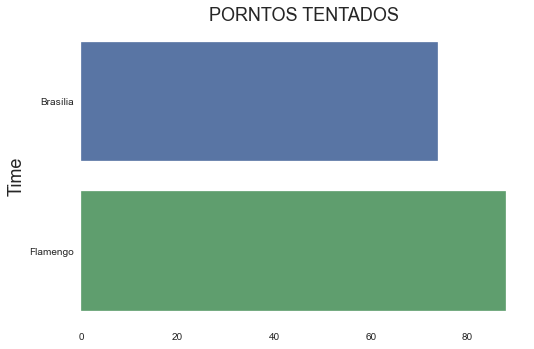

In [184]:
sns.set_style('white')
sns.barplot(x='Pts_T', y='Time', data=tabela_times, hue_order=True)
plt.title('PORNTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16

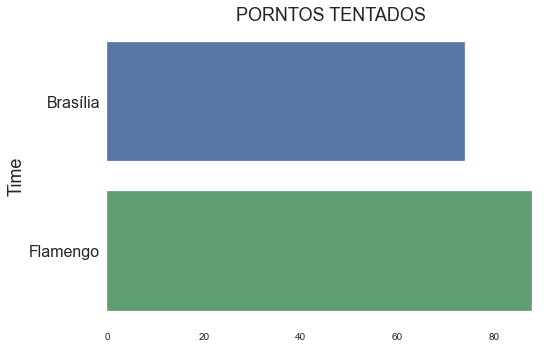

In [185]:
sns.set_style('white')
sns.barplot(x='Pts_T', y='Time', data=tabela_times)
plt.title('PORNTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16
plt.savefig('RELATORIO/Pts_T.png', format='png')
# colocar f'RELATORIO/{indicador}.png', format='png')
# para realizar uma def e no def poder retirar todas essas linhas e apenas apresentar o indicador técnico 

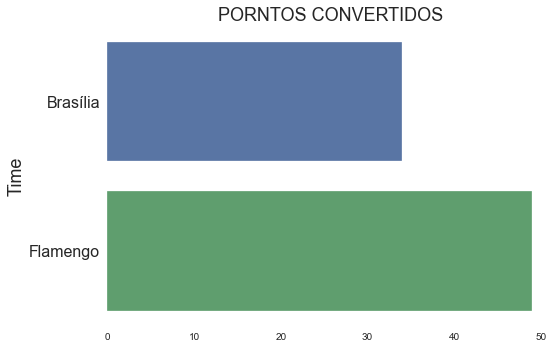

In [186]:
sns.set_style('white')
sns.barplot(x='Pts_C', y='Time', data=tabela_times)
plt.title('PORNTOS CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16
plt.savefig('RELATORIO/Pts_C.png', format='png')

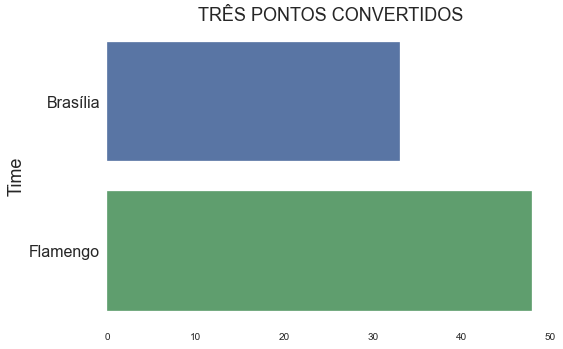

In [187]:
sns.set_style('white')
sns.barplot(x='Pts_3_C', y='Time', data=tabela_times)
plt.title('TRÊS PONTOS CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16
plt.savefig('RELATORIO/Pts_3_C.png', format='png')

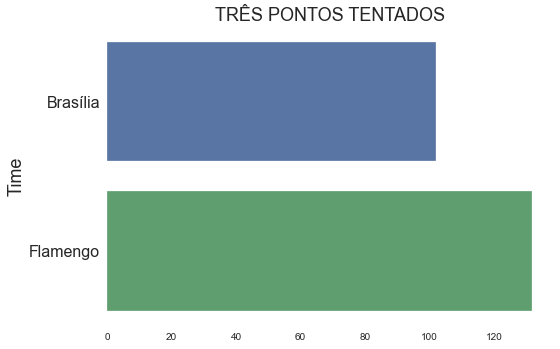

In [188]:
sns.set_style('white')
sns.barplot(x='Pts_3_T', y='Time', data=tabela_times)
plt.title('TRÊS PONTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/Pts_3_T.png', format='png')

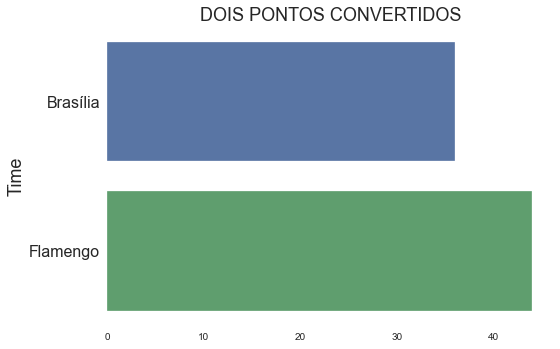

In [189]:
sns.set_style('white')
sns.barplot(x='Pts_2_C', y='Time', data=tabela_times)
plt.title('DOIS PONTOS CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/Pts_2_C.png', format='png')

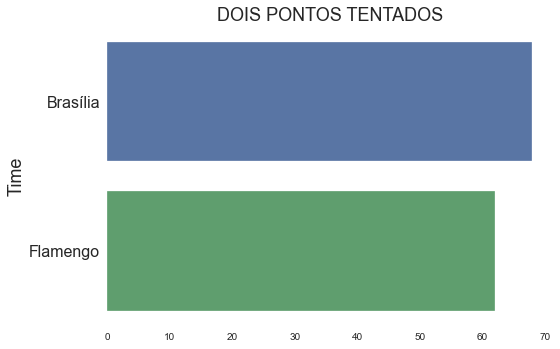

In [190]:
sns.set_style('white')
sns.barplot(x='Pts_2_T', y='Time', data=tabela_times)
plt.title('DOIS PONTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/Pts_2_T.png', format='png')

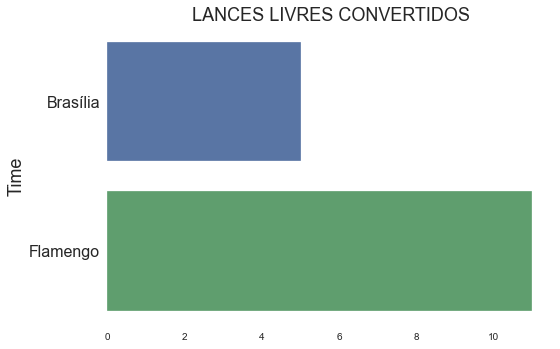

In [191]:
sns.set_style('white')
sns.barplot(x='LL_C', y='Time', data=tabela_times)
plt.title('LANCES LIVRES CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/LL_C.png', format='png')

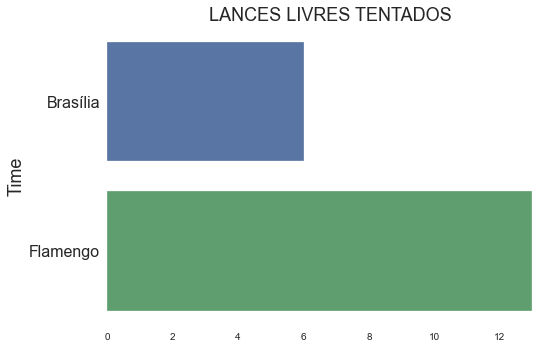

In [192]:
sns.set_style('white')
sns.barplot(x='LL_T', y='Time', data=tabela_times)
plt.title('LANCES LIVRES TENTADOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/LL_T.png', format='png')

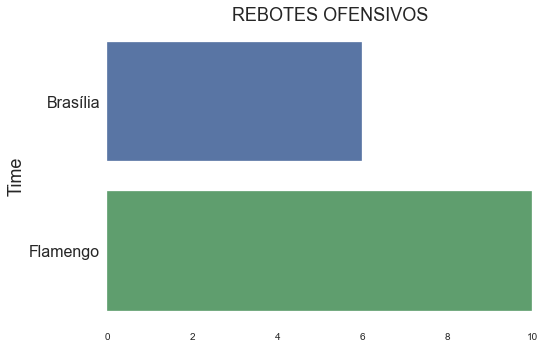

In [193]:
sns.set_style('white')
sns.barplot(x='RO', y='Time', data=tabela_times)
plt.title('REBOTES OFENSIVOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/RO.png', format='png')

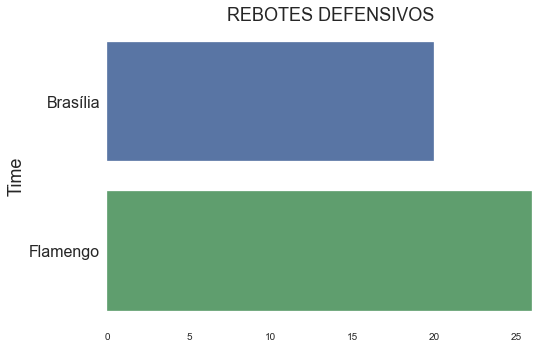

In [194]:
sns.set_style('white')
sns.barplot(x='RD', y='Time', data=tabela_times)
plt.title('REBOTES DEFENSIVOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/RD.png', format='png')

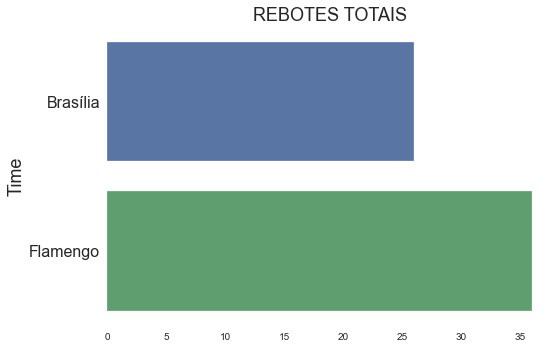

In [195]:
sns.set_style('white')
sns.barplot(x='RT', y='Time', data=tabela_times)
plt.title('REBOTES TOTAIS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/RT.png', format='png')

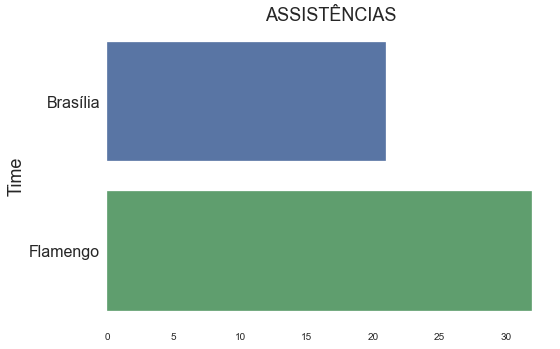

In [196]:
sns.set_style('white')
sns.barplot(x='AS', y='Time', data=tabela_times)
plt.title('ASSISTÊNCIAS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/AS.png', format='png')

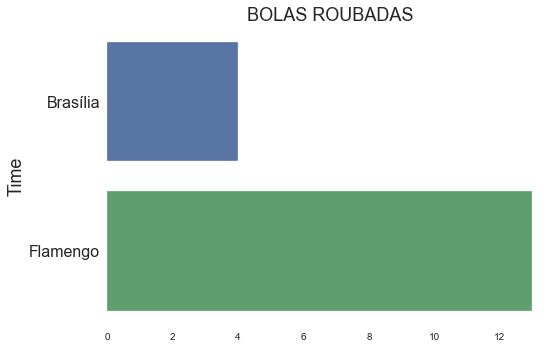

In [197]:
sns.set_style('white')
sns.barplot(x='BR', y='Time', data=tabela_times)
plt.title('BOLAS ROUBADAS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/BR.png', format='png')

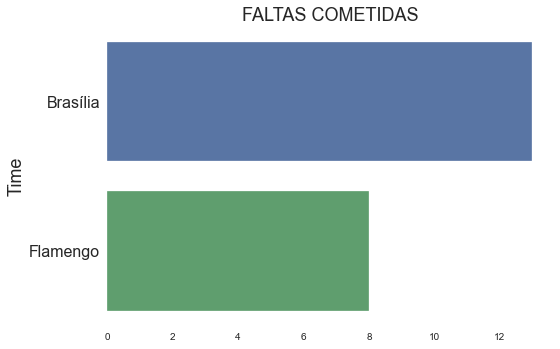

In [198]:
sns.set_style('white')
sns.barplot(x='FC', y='Time', data=tabela_times)
plt.title('FALTAS COMETIDAS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/FC.png', format='png')

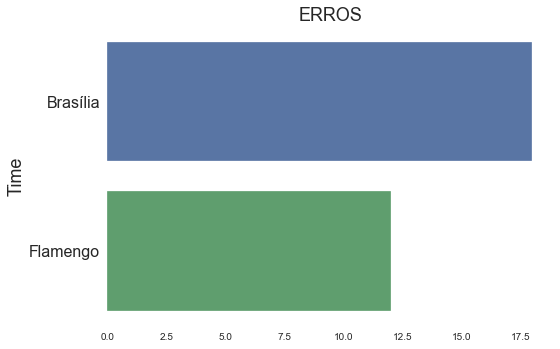

In [199]:
sns.set_style('white')
sns.barplot(x='ER', y='Time', data=tabela_times)
plt.title('ERROS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/ER.png', format='png')

# Gráficos com as análises avançadas 

Para se comparar os indicadores técnicos precisamos olhar não só do jogo mas tb da liga 

In [200]:
para_grafico_time_1 = analise[(analise['Time'] == nome_time_casa) & (analise['Nome'] == 'Equipe')]
para_grafico_time_1.reset_index(drop=True, inplace=True)

In [201]:
para_grafico_time_1.drop(['Oponente', 'Data', 'Casa/Fora', 'Classificatoria/Playoffs', 'Nome'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### precisa acrescentar ao data frame os valore que representam a melhor temporda
### Comparar com a perfeição 

In [202]:
todas_temporadas = pd.DataFrame({'Time':['Melhor'],'EF_Pts':[0.700], 'EF_Pts_3':[0.700], 'EF_LL':[4.000], 'eFG_%':[0.7],
                                 'TOV_%':[25.0], 'FTA/FGA':[0.2], 'Posse_de_Bola':[100.0], 'Offensive_Rating':[200.0],
                                 'TS_%':[1.000], 'Ass/ER':[3.000], 'AS_Ratio':[30.0]})

In [203]:
# para_grafico_temporadas = pd.concat([para_grafico,todas_temporadas], ignore_index=True)

In [204]:
para_grafico_time_1

,Time,EF_Pts,FR_3_Pts_C,FR_3_Pts_T,EF_Pts_3,FR_2_Pts_C,FR_2_Pts_T,EF_Pts_2,FR_LL_C,FR_LL_T,EF_LL,eFG_%,TOV_%,FTA/FGA,Posse_de_Bola,Offensive_Rating,TS_%,Ass/ER,AS_Ratio
0,Brasília,0.459,2.912,4.135,0.324,2.118,1.838,0.529,0.147,0.081,0.833,0.669,20.3,0.207,83.0,41.0,0.24,1.167,25.3


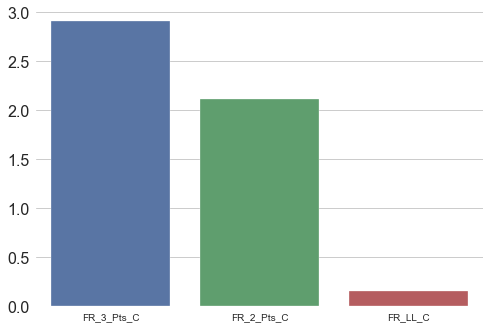

In [205]:
frequencia_certo = ['FR_3_Pts_C', 'FR_2_Pts_C', 'FR_LL_C']
valores = [para_grafico_time_1['FR_3_Pts_C'][0], para_grafico_time_1['FR_2_Pts_C'][0], para_grafico_time_1['FR_LL_C'][0]]
sns.set_style('whitegrid')
sns.barplot(x=frequencia_certo, y=valores)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

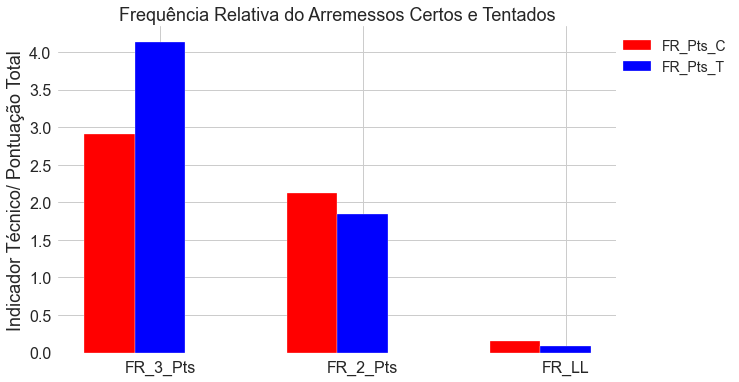

In [206]:
# Gráfico sobre a frequência relativa do arremessos certos e tentados 
FR_Pts_C = [para_grafico_time_1['FR_3_Pts_C'][0], para_grafico_time_1['FR_2_Pts_C'][0], para_grafico_time_1['FR_LL_C'][0]]
FR_Pts_T = [para_grafico_time_1['FR_3_Pts_T'][0], para_grafico_time_1['FR_2_Pts_T'][0], para_grafico_time_1['FR_LL_T'][0]]


# Definir a largura das barras
barWidth = 0.25

# Aumentar o gráfico
plt.figure(figsize=(10,6))

# Definir as posições das barras 
r1 = np.arange(len(FR_Pts_C))
r2 = [x + barWidth for x in r1]

# Estilo que vamos utilizar na barras
sns.set_style('whitegrid')

# Criar as barras 
plt.bar(r1, FR_Pts_C, color='red', width=barWidth, label='FR_Pts_C')
plt.bar(r2, FR_Pts_T, color='blue', width=barWidth, label='FR_Pts_T')


# Adicionando legendas as barras
plt.title('Frequência Relativa do Arremessos Certos e Tentados', fontsize=18)
plt.ylabel('Indicador Técnico/ Pontuação Total', fontsize=18)
plt.xlabel('')
plt.xticks([r + barWidth for r in range(len(FR_Pts_C))], ['FR_3_Pts', 'FR_2_Pts', 'FR_LL'],)

# Criar a legenda e exibir o gráfico
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1), prop={'size':14})
plt.show()

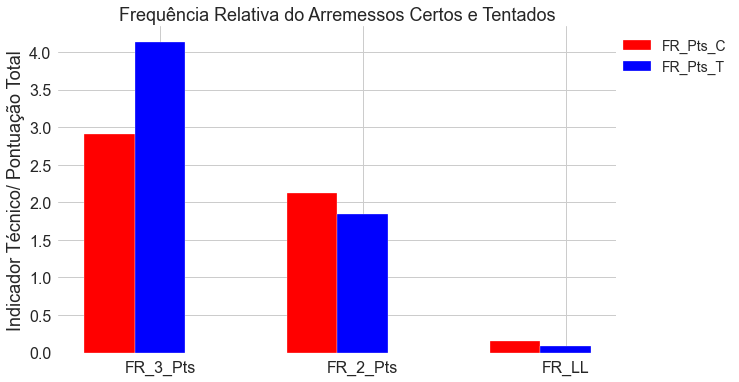

In [207]:
# Gráfico sobre a frequência relativa do arremessos certos e tentados 
FR_Pts_C = [para_grafico_time_1['FR_3_Pts_C'][0], para_grafico_time_1['FR_2_Pts_C'][0], para_grafico_time_1['FR_LL_C'][0]]
FR_Pts_T = [para_grafico_time_1['FR_3_Pts_T'][0], para_grafico_time_1['FR_2_Pts_T'][0], para_grafico_time_1['FR_LL_T'][0]]


# Definir a largura das barras
barWidth = 0.25

# Aumentar o gráfico
plt.figure(figsize=(10,6))

# Definir as posições das barras 
r1 = np.arange(len(FR_Pts_C))
r2 = [x + barWidth for x in r1]

# Estilo que vamos utilizar na barras
sns.set_style('whitegrid')

# Criar as barras 
plt.bar(r1, FR_Pts_C, color='red', width=barWidth, label='FR_Pts_C')
plt.bar(r2, FR_Pts_T, color='blue', width=barWidth, label='FR_Pts_T')


# Adicionando legendas as barras
plt.title('Frequência Relativa do Arremessos Certos e Tentados', fontsize=18)
plt.ylabel('Indicador Técnico/ Pontuação Total', fontsize=18)
plt.xlabel('')
plt.xticks([r + barWidth for r in range(len(FR_Pts_C))], ['FR_3_Pts', 'FR_2_Pts', 'FR_LL'],)

# Criar a legenda e exibir o gráfico
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1), prop={'size':14})
plt.show()

### Time 2

In [208]:
para_grafico_time_2 = analise[(analise['Time'] == nome_time_fora) & (analise['Nome'] == 'Equipe')]
para_grafico_time_2.reset_index(drop=True, inplace=True)

In [209]:
para_grafico_time_2.drop(['Oponente', 'Data', 'Casa/Fora', 'Classificatoria/Playoffs', 'Nome'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


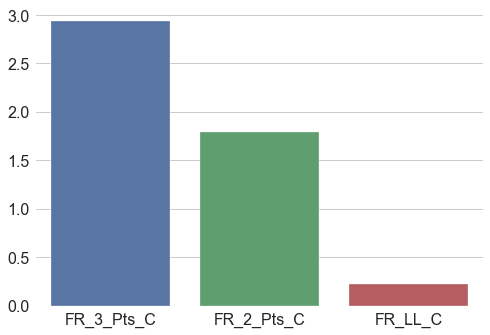

In [210]:
frequencia_certo = ['FR_3_Pts_C', 'FR_2_Pts_C', 'FR_LL_C']
valores = [para_grafico_time_2['FR_3_Pts_C'][0], para_grafico_time_2['FR_2_Pts_C'][0], para_grafico_time_2['FR_LL_C'][0]]
sns.set_style('whitegrid')
sns.barplot(x=frequencia_certo, y=valores)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

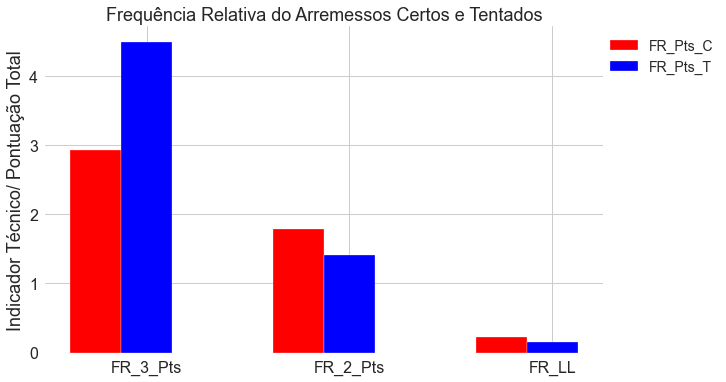

In [211]:
# Gráfico sobre a frequência relativa do arremessos certos e tentados 
FR_Pts_C = [para_grafico_time_2['FR_3_Pts_C'][0], para_grafico_time_2['FR_2_Pts_C'][0], para_grafico_time_2['FR_LL_C'][0]]
FR_Pts_T = [para_grafico_time_2['FR_3_Pts_T'][0], para_grafico_time_2['FR_2_Pts_T'][0], para_grafico_time_2['FR_LL_T'][0]]


# Definir a largura das barras
barWidth = 0.25

# Aumentar o gráfico
plt.figure(figsize=(10,6))

# Definir as posições das barras 
r1 = np.arange(len(FR_Pts_C))
r2 = [x + barWidth for x in r1]

# Estilo que vamos utilizar na barras
sns.set_style('whitegrid')

# Criar as barras 
plt.bar(r1, FR_Pts_C, color='red', width=barWidth, label='FR_Pts_C')
plt.bar(r2, FR_Pts_T, color='blue', width=barWidth, label='FR_Pts_T')


# Adicionando legendas as barras
plt.title('Frequência Relativa do Arremessos Certos e Tentados', fontsize=18)
plt.ylabel('Indicador Técnico/ Pontuação Total', fontsize=18)
plt.xlabel('')
plt.xticks([r + barWidth for r in range(len(FR_Pts_C))], ['FR_3_Pts', 'FR_2_Pts', 'FR_LL'],)

# Criar a legenda e exibir o gráfico
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1), prop={'size':14})
plt.show()

# jogos antigos podem apresentar erros no placar de cada quarto,
# pois se termina com fim da partida e não fim de quarto 

In [212]:
ponto_quarto = df[(df['Indicador'] == 'fim_quarto')][::-1]
ponto_quarto.reset_index(drop=True, inplace=True)
ponto_quarto

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante,diferenca_placar_absoluto
0,1,600,24,22,NaN,fim_quarto,NaN,2,-2,2
1,2,1200,33,50,NaN,fim_quarto,NaN,-17,17,17
2,3,1800,50,75,NaN,fim_quarto,NaN,-25,25,25
3,4,2400,74,103,NaN,fim_quarto,NaN,-29,29,29


In [213]:
inf_placar_casa = ponto_quarto['placar_casa'].diff()
inf_placar_casa[0] = ponto_quarto['placar_casa'][0]
inf_placar_casa = inf_placar_casa.astype(int)
inf_placar_casa = inf_placar_casa.tolist()
inf_placar_casa

[24, 9, 17, 24]

In [214]:
inf_placar_fora = ponto_quarto['placar_visitante'].diff()
inf_placar_fora[0] = ponto_quarto['placar_visitante'][0]
inf_placar_fora = inf_placar_fora.astype(int)
inf_placar_fora = inf_placar_fora.tolist()
inf_placar_fora

[22, 28, 25, 28]

In [215]:
placar_casa = sum(inf_placar_casa)

In [216]:
placar_fora = sum(inf_placar_fora)

## mudanças 

* Colocar mais def na capa por tem jogos com prorrogação
* as corres dos times devem sincronizar com os gráficos
* acrescentar o valor de Eficiência do jogador
* acrescentar os minutos em quadra do time e jogadores (usar 'ultima_linha')
* mudar times para Arial
* mudar a palheta do tempo de posse de bola para quente (mais tempo de bola), fria (menos tempo de bola)

In [217]:
pdf = FPDF('P', 'mm', 'A4')
# Capa do relatório
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# capa
criar_titulo(pdf, data_hoje)
fotos_dos_times(pdf, img_casa, nome_time_casa, img_fora, nome_time_fora)
informacoes_do_placar(pdf, classificatoria, placar_casa, placar_fora, dia_do_jogo)
grafico_quartos_normal(pdf, nome_time_casa, nome_time_fora)
placar_do_quarto1(pdf, inf_placar_casa, inf_placar_fora)
placar_do_quarto2(pdf, inf_placar_casa, inf_placar_fora)
placar_do_quarto3(pdf, inf_placar_casa, inf_placar_fora)
placar_do_quarto4(pdf, inf_placar_casa, inf_placar_fora)
placar_final(pdf, placar_casa, placar_fora)
informacoes_do_relatorio(pdf)


# Primeira página de Análises 
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Títulos das Análises
comentarios_p1(pdf)
# Gráficos das Análises linha 1
graficos_analise_descrivita_l1(pdf, tabela_times, arquivo)
# Gráficos das Análises linha 2
graficos_analise_descrivita_l2(pdf, tabela_times, arquivo)
comentarios_p1_1(pdf)
# Gráficos das Análises linha 3
graficos_analise_descrivita_l3(pdf, tabela_times, arquivo)
# Gráficos das Análises linha 4
graficos_analise_descrivita_l4(pdf, tabela_times, arquivo)
comentarios_p1_2(pdf)

# Segunda Página de Análises 
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Comentarios das Análises Avançadas
comentarios_p2(pdf)
# Gráficos das Análises
graficos_analise_avancadas_c1(pdf, tabela_times, arquivo)
graficos_analise_avancadas_c2(pdf, tabela_times, arquivo)
graficos_analise_avancadas_c3(pdf, tabela_times, arquivo)
# considerações finais 
comentarios_p2_1(pdf)


# Terceira Página de Análises Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Análises
comentarios_p3(pdf, nome_time_casa)
# Análise do time da casa
melhores_jogadores_l1(pdf)
melhores_jogadores_l2(pdf)
# foto dos jogadores
foto_melhor_pontuador(pdf, arquivo1, pontos_c_1)
cinco_melhores_pontuadores(pdf, pontos_c_1)

# foto dos melhores  porntuadores de três
foto_melhor_pontuador_tres(pdf, arquivo1, tres_pontos_c_1)
cinco_melhores_pontuadores_tres(pdf, tres_pontos_c_1)
# foto dos melhores  porntuadores de dois
foto_melhor_pontuador_dois(pdf, arquivo1, dois_pontos_c_1)
cinco_melhores_pontuadores_dois(pdf, dois_pontos_c_1)
# foto dos melhores assistentes
foto_melhor_assistente(pdf, arquivo1, as_1)
cinco_melhores_assistencias(pdf, as_1)
# foto dos melhores reboteiros
foto_melhor_rebotes(pdf, arquivo1, rt_1)
cinco_melhores_reboteiros(pdf, rt_1)
# foto dos melhores faltas recebidas
foto_melhor_faltas_recebidas(pdf, arquivo1, fr_1)
cinco_melhores_faltas_recebidas(pdf, fr_1)
# tabela geral
tabela_geral_casa(pdf, arquivo)

# Quarta Página Períodos Positivos do Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Positivos do Time da Casa
comentarios_p4(pdf, nome_time_casa)
# Gráfico dos Períodos Positos do Time da Casa
grafico_periodos_positivos_casa(pdf, arquivo)
# Gráfico do tempo de Posse de Bola do Time da Casa 
grafico_tempo_posse_de_bola_casa(pdf, arquivo)
# Comentários
comentarios_p4_1(pdf)

# Quinta Página Períodos Positivos do Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título do cinco melores jogadores
comentarios_p5(pdf, nome_time_casa)
primeiro_quinteto_fotos_casa(pdf)
segundo_quinteto_fotos_casa(pdf)
terceiro_quinteto_fotos_casa(pdf)
# Título das Melhores substituições
comentarios_p5_1(pdf)
# Jogadores e Comentários
substituicao_1_casa(pdf)
substituicao_2_casa(pdf)

# Sexta Página de Análises Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Análises
comentarios_p3(pdf, nome_time_fora)
# Análise do time da casa
melhores_jogadores_l1(pdf)
melhores_jogadores_l2(pdf)
# foto dos jogadores
foto_melhor_pontuador(pdf, arquivo2, pontos_c_2)
cinco_melhores_pontuadores(pdf, pontos_c_2)
# foto dos melhores  porntuadores de três
foto_melhor_pontuador_tres(pdf, arquivo2, tres_pontos_c_2)
cinco_melhores_pontuadores_tres(pdf, tres_pontos_c_2)
# foto dos melhores  porntuadores de dois
foto_melhor_pontuador_dois(pdf, arquivo2, dois_pontos_c_2)
cinco_melhores_pontuadores_dois(pdf, dois_pontos_c_2)
# foto dos melhores assistentes
foto_melhor_assistente(pdf, arquivo2, as_2)
cinco_melhores_assistencias(pdf, as_2)
# foto dos melhores reboteiros
foto_melhor_rebotes(pdf, arquivo2, rt_2)
cinco_melhores_reboteiros(pdf, rt_2)
# foto dos melhores faltas recebidas
foto_melhor_faltas_recebidas(pdf, arquivo2, fr_2)
cinco_melhores_faltas_recebidas(pdf, fr_2)
# tabela geral
tabela_geral_fora(pdf, arquivo)

# Setima Página Períodos Positivos do Time da Fora
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Positivos do Time da Fora
comentarios_p7(pdf, nome_time_fora)
# Gráfico dos Períodos Positos do Time da Fora
grafico_periodos_positivos_fora(pdf, arquivo)
# Gráfico do tempo de Posse de Bola do Time da Fora 
grafico_tempo_posse_de_bola_fora(pdf, arquivo)
# Comentários
comentarios_p7_1(pdf)

# Oitava Página Períodos Positivos do Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título do cinco melores jogadores
comentarios_p8(pdf, nome_time_fora)
primeiro_quinteto_fotos_fora(pdf)
segundo_quinteto_fotos_fora(pdf)
terceiro_quinteto_fotos_fora(pdf)
# Título das Melhores substituições
comentarios_p8_1(pdf)
# Jogadores e Comentários
substituicao_1_fora(pdf)
substituicao_2_fora(pdf)

pdf.output('teste.pdf', 'F')

''

# identificação dos quintetos em quadra 

In [218]:
# faz um if com o seguinte critério 
# if aparecer substituição_entra:
#     a função adiciona o jogador x
# elif aparecer substituição_sai:
#     a função substitui o valor por 0